# RWAS: LBD (path + clin) vs. Controls (DementiaSeq, Wellderly, LNG) 

**Start date:** 07-27-2020

**Updated date:** 2024-01-10

**Author(s):** Ruth Chia

**Working directory on biowulf:** `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM`

In [ ]:
!pwd

## ***UPDATED 12-26-2023:*** RWAS

**Note:** to use the summ stats from XWAS with covariates adjustment using merge x-autosomal PCs from the female and male stratified analysis.

In [ ]:
!mkdir RWAS_redo
!mkdir RWAS_redo/both
!mkdir RWAS_redo/females_only
!mkdir RWAS_redo/males_only

In [ ]:
!mkdir RWAS_redo/cond_ApoE4
!mkdir RWAS_redo/cond_ApoE4/both
!mkdir RWAS_redo/cond_ApoE4/females_only
!mkdir RWAS_redo/cond_ApoE4/males_only

### annotate snps to regulatory region

In [ ]:
%%bash
#just focus on brain derived tissues. There should be 13 brain tissues with enhancer maps.

ENH_DIR="/data/ALS_50k/Paola/ALS" 
cat ${ENH_DIR}/Enhancer_maps/enhancer_tissue_names.txt | grep -i "brain" > RWAS_redo/enhancer_brain_tissue_names.txt
cat RWAS_redo/enhancer_brain_tissue_names.txt

In [ ]:
%%bash

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo"

mkdir RWAS_redo/Enhancer_annotation

# create tissue specific annotation folders for each cohort
# this folder will be used to populate the annotations from the code below
cat ${WORKING_DIR}/enhancer_brain_tissue_names.txt | while read line
do
mkdir ${WORKING_DIR}/Enhancer_annotation/${line}
done

In [ ]:
%%bash

# create plink files for males+females i.e. both with maf(overall) > 0.01
DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS"
WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo"

module load plink 

plink2 \
--bfile $DIR/merged.clean/FINAL.QC.males.females.noPAR.chrX \
--maf 0.01 \
--genotyping-rate \
--make-bed \
--out ${WORKING_DIR}/FINAL.QC.males.females.noPAR_MAF001.chrX

In [ ]:
%%bash

DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS"
WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo"

module load plink/3.6-alpha

# create plink files for females only with maf(overall) > 0.01
plink2 \
--bfile $DIR/merged.clean/FINAL.QC.males.females.noPAR.chrX \
--maf 0.01 \
--keep-females \
--genotyping-rate \
--make-bed \
--out ${WORKING_DIR}/FINAL.QC.females.noPAR_MAF001.chrX

# create plink files for males only with maf(overall) > 0.01
plink2 \
--bfile $DIR/merged.clean/FINAL.QC.males.females.noPAR.chrX \
--maf 0.01 \
--keep-males \
--genotyping-rate \
--make-bed \
--out ${WORKING_DIR}/FINAL.QC.males.noPAR_MAF001.chrX

In [ ]:
%%bash

ENH_DIR="/data/ALS_50k/Paola/ALS" 
DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS"
WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo"

module load magma/1.10

# for both i.e. overall
cat ${WORKING_DIR}/enhancer_brain_tissue_names.txt | while read line
do
magma \
--annotate --snp-loc ${WORKING_DIR}/FINAL.QC.males.females.noPAR_MAF001.chrX.bim \
--gene-loc ${ENH_DIR}/Enhancer_maps/hg19_to_hg38/${line}enh_enhancer_boundaries_noMHC_centered.tbl.LiftOver.bed_update-map_to_b38.centered.loc_UPDATED \
--out ${WORKING_DIR}/Enhancer_annotation/${line}/SNPs_annotated_LBD.both_${line}.chrX
done

# for females only
cat ${WORKING_DIR}/enhancer_brain_tissue_names.txt | while read line
do
magma \
--annotate --snp-loc ${WORKING_DIR}/FINAL.QC.females.noPAR_MAF001.chrX.bim \
--gene-loc ${ENH_DIR}/Enhancer_maps/hg19_to_hg38/${line}enh_enhancer_boundaries_noMHC_centered.tbl.LiftOver.bed_update-map_to_b38.centered.loc_UPDATED \
--out ${WORKING_DIR}/Enhancer_annotation/${line}/SNPs_annotated_LBD.females_${line}.chrX
done

# for males only
cat ${WORKING_DIR}/enhancer_brain_tissue_names.txt | while read line
do
magma \
--annotate --snp-loc ${WORKING_DIR}/FINAL.QC.males.noPAR_MAF001.chrX.bim \
--gene-loc ${ENH_DIR}/Enhancer_maps/hg19_to_hg38/${line}enh_enhancer_boundaries_noMHC_centered.tbl.LiftOver.bed_update-map_to_b38.centered.loc_UPDATED \
--out ${WORKING_DIR}/Enhancer_annotation/${line}/SNPs_annotated_LBD.males_${line}.chrX
done


### Perform a regulatory region-based GWAS

Summ stats to use from the XWAS adjusted using covariates from merged x-autosomal PCs:
1. unconditioned joint-both: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/both_x-autosomal-pc/toMeta.LBD.controls.UNRELATED.hg38.chrX.tab`

2. unconditioned females only: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/females_only_x-autosomal-pc/toMeta.LBD.controls.UNRELATED.females.hg38.chrX.tab`

3. unconditioned males only: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/males_only_x-autosomal-pc/toMeta.LBD.controls.UNRELATED.males.hg38.chrX.tab`

4. ApoE4 conditioned joint-both: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/cond_ApoE4_x-autosomal-pc/both/toMeta.LBD.controls.UNRELATED.hg38.chrX.tab`

5. ApoE4 conditioned females only: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/cond_ApoE4_x-autosomal-pc/females_only/toMeta.LBD.controls.UNRELATED.females.hg38.chrX.tab`

6. ApoE4 conditioned males only: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/cond_ApoE4_x-autosomal-pc/males_only/toMeta.LBD.controls.UNRELATED.males.hg38.chrX.tab`


In [26]:
%%bash

# filter summ stats for RWAS so that the results included for RWAS analysis are the ones that are 
# in the manhattan plot i.e. MAF(overall) > 0.01

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"
cd ${WORKING_DIR}/RWAS_redo

awk 'NR==1;NR>1 {if($11 > 0.01 && $11 < 0.99) print}' ${WORKING_DIR}/both_x-autosomal-pc/toMeta.LBD.controls.UNRELATED.hg38.chrX.tab > both/toMeta.LBD.controls.UNRELATED.both.maf0.01overall.hg38.chrX.tab
awk 'NR==1;NR>1 {if($11 > 0.01 && $11 < 0.99) print}' ${WORKING_DIR}/females_only_x-autosomal-pc/toMeta.LBD.controls.UNRELATED.females.hg38.chrX.tab > females_only/toMeta.LBD.controls.UNRELATED.females.maf0.01overall.hg38.chrX.tab
awk 'NR==1;NR>1 {if($11 > 0.01 && $11 < 0.99) print}' ${WORKING_DIR}/males_only_x-autosomal-pc/toMeta.LBD.controls.UNRELATED.males.hg38.chrX.tab > males_only/toMeta.LBD.controls.UNRELATED.males.maf0.01overall.hg38.chrX.tab

awk 'NR==1;NR>1 {if($11 > 0.01 && $11 < 0.99) print}' ${WORKING_DIR}/cond_ApoE4_x-autosomal-pc/both/toMeta.LBD.controls.UNRELATED.hg38.chrX.tab > cond_ApoE4/both/toMeta.LBD.controls.UNRELATED.both.maf0.01overall.hg38.chrX.tab
awk 'NR==1;NR>1 {if($11 > 0.01 && $11 < 0.99) print}' ${WORKING_DIR}/cond_ApoE4_x-autosomal-pc/females_only/toMeta.LBD.controls.UNRELATED.females.hg38.chrX.tab > cond_ApoE4/females_only/toMeta.LBD.controls.UNRELATED.females.maf0.01overall.hg38.chrX.tab
awk 'NR==1;NR>1 {if($11 > 0.01 && $11 < 0.99) print}' ${WORKING_DIR}/cond_ApoE4_x-autosomal-pc/males_only/toMeta.LBD.controls.UNRELATED.males.hg38.chrX.tab > cond_ApoE4/males_only/toMeta.LBD.controls.UNRELATED.males.maf0.01overall.hg38.chrX.tab

In [34]:
%%bash

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"

module load magma/1.10

cohort="both"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
magma \
--bfile ${WORKING_DIR}/RWAS_redo/FINAL.QC.males.females.noPAR_MAF001.chrX \
--pval ${WORKING_DIR}/RWAS_redo/${cohort}/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab use='ID,P' N=6614 \
--gene-annot ${WORKING_DIR}/RWAS_redo/Enhancer_annotation/${line}/SNPs_annotated_LBD.${cohort}_${line}.chrX.genes.annot \
--out ${WORKING_DIR}/RWAS_redo/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX
done

cohort="females"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
magma \
--bfile ${WORKING_DIR}/RWAS_redo/FINAL.QC.${cohort}.noPAR_MAF001.chrX \
--pval ${WORKING_DIR}/RWAS_redo/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab use='ID,P' N=3008 \
--gene-annot ${WORKING_DIR}/RWAS_redo/Enhancer_annotation/${line}/SNPs_annotated_LBD.${cohort}_${line}.chrX.genes.annot \
--out ${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX
done

cohort="males"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
magma \
--bfile ${WORKING_DIR}/RWAS_redo/FINAL.QC.${cohort}.noPAR_MAF001.chrX \
--pval ${WORKING_DIR}/RWAS_redo/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab use='ID,P' N=3606 \
--gene-annot ${WORKING_DIR}/RWAS_redo/Enhancer_annotation/${line}/SNPs_annotated_LBD.${cohort}_${line}.chrX.genes.annot \
--out ${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX
done


[+] Loading magma  1.10  on cn2294 


Welcome to MAGMA v1.10 (custom)
Using flags:
	--bfile /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/FINAL.QC.males.females.noPAR_MAF001.chrX
	--pval /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/both/toMeta.LBD.controls.UNRELATED.both.maf0.01overall.hg38.chrX.tab use=ID,P N=6614
	--gene-annot /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/Enhancer_annotation/E053brain/SNPs_annotated_LBD.both_E053brain.chrX.genes.annot
	--out /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/both/SNPs_pval_LBD.both_E053brain.chrX

Start time is 06:38:47, Friday 05 Jan 2024

Loading PLINK-format data...
Reading file /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/FINAL.QC.males.females.noPAR_MAF001.chrX.fam... 6632 individuals read
Reading file /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/R

In [35]:
%%bash

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"

module load magma/1.10

cohort="both"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
magma \
--bfile ${WORKING_DIR}/RWAS_redo/FINAL.QC.males.females.noPAR_MAF001.chrX \
--pval ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab use='ID,P' N=6614 \
--gene-annot ${WORKING_DIR}/RWAS_redo/Enhancer_annotation/${line}/SNPs_annotated_LBD.${cohort}_${line}.chrX.genes.annot \
--out ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX
done

cohort="females"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
magma \
--bfile ${WORKING_DIR}/RWAS_redo/FINAL.QC.${cohort}.noPAR_MAF001.chrX \
--pval ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab use='ID,P' N=3008 \
--gene-annot ${WORKING_DIR}/RWAS_redo/Enhancer_annotation/${line}/SNPs_annotated_LBD.${cohort}_${line}.chrX.genes.annot \
--out ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX
done

cohort="males"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
magma \
--bfile ${WORKING_DIR}/RWAS_redo/FINAL.QC.${cohort}.noPAR_MAF001.chrX \
--pval ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab use='ID,P' N=3606 \
--gene-annot ${WORKING_DIR}/RWAS_redo/Enhancer_annotation/${line}/SNPs_annotated_LBD.${cohort}_${line}.chrX.genes.annot \
--out ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX
done


[+] Loading magma  1.10  on cn2294 


Welcome to MAGMA v1.10 (custom)
Using flags:
	--bfile /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/FINAL.QC.males.females.noPAR_MAF001.chrX
	--pval /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/cond_ApoE4/both/toMeta.LBD.controls.UNRELATED.both.maf0.01overall.hg38.chrX.tab use=ID,P N=6614
	--gene-annot /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/Enhancer_annotation/E053brain/SNPs_annotated_LBD.both_E053brain.chrX.genes.annot
	--out /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/cond_ApoE4/both/SNPs_pval_LBD.both_E053brain.chrX

Start time is 06:43:36, Friday 05 Jan 2024

Loading PLINK-format data...
Reading file /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/FINAL.QC.males.females.noPAR_MAF001.chrX.fam... 6632 individuals read
Reading file /data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/L

### quick check to see if there are any significant RWAS results

number of mapped enhancer is different for each tissue.

therefore the bonferroni threshold = 0.05/number of tissue specific mapped enhancers

In [36]:
%%bash

# reformat outputs so that a single tab is the delimiter

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"

cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
for cohort in both
do
cat ${WORKING_DIR}/RWAS_redo/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out | tr -s ' ' '\t' > ${WORKING_DIR}/RWAS_redo/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt
done
done

cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
for cohort in {females,males}
do
cat ${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out | tr -s ' ' '\t' > ${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt
done
done


cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
for cohort in both
do
cat ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out | tr -s ' ' '\t' > ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt
done
done

cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
for cohort in {females,males}
do
cat ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out | tr -s ' ' '\t' > ${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt
done
done


In [37]:
import pandas as pd
import numpy as np

def filter_RWAS_signif_both(cohort,i):
    cohort = cohort
    tissue = i
    input = "RWAS_redo/" + cohort + "/SNPs_pval_LBD." + cohort + "_" + tissue + ".chrX.genes.out.txt"
    data = pd.read_csv(input,sep="\t")
    data = data.fillna("NA")

    # set bonferroni threshold
    print("Number of mapped enhancers = " + str(data.shape[0]))
    p_threshold = 0.05/data.shape[0]
    print("Bonferroni threshold for " + tissue + " = " + str(p_threshold))
    
    # filter to keep significant results
    signif = data[(data.P < p_threshold)]
    output = "RWAS_redo/" + cohort + "/SNPs_pval_LBD." + cohort + "_" + tissue + ".chrX.genes.out_signif.txt"
    signif.to_csv(output, sep="\t", index=False, header=True)
    print("Number of significant mapped enhancers = " + str(signif.shape[0]))

In [38]:
import pandas as pd
import numpy as np

def filter_RWAS_signif_sexstrat(cohort,i):
    cohort = cohort
    tissue = i
    input = "RWAS_redo/" + cohort + "_only/SNPs_pval_LBD." + cohort + "_" + tissue + ".chrX.genes.out.txt"
    data = pd.read_csv(input,sep="\t")
    data = data.fillna("NA")

    # set bonferroni threshold
    print("Number of mapped enhancers = " + str(data.shape[0]))
    p_threshold = 0.05/data.shape[0]
    print("Bonferroni threshold for " + tissue + " = " + str(p_threshold))
    
    # filter to keep significant results
    signif = data[(data.P < p_threshold)]
    output = "RWAS_redo/" + cohort + "_only/SNPs_pval_LBD." + cohort + "_" + tissue + ".chrX.genes.out_signif.txt"
    signif.to_csv(output, sep="\t", index=False, header=True)
    print("Number of significant mapped enhancers = " + str(signif.shape[0]))

In [39]:
tissue_list = ['E053brain','E054brain','E067brain','E068brain','E069brain','E070brain','E071brain','E072brain','E073brain','E074brain','E081brain','E082brain','E125brain']

for i in tissue_list:
    filter_RWAS_signif_both("both",i)

Number of mapped enhancers = 808
Bonferroni threshold for E053brain = 6.188118811881188e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1119
Bonferroni threshold for E054brain = 4.468275245755139e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1835
Bonferroni threshold for E067brain = 2.7247956403269757e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1846
Bonferroni threshold for E068brain = 2.7085590465872156e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1847
Bonferroni threshold for E069brain = 2.7070925825663238e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 928
Bonferroni threshold for E070brain = 5.387931034482759e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1525
Bonferroni threshold for E071brain = 3.278688524590164e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1814
Bonferroni th

EID | Tissue type
----|------------
E053brain | Cortex derived primary cultured neurospheres (811)
E054brain | Ganglion Eminence derived primary cultured neurospheres (1122)
E067brain | Brain Angular Gyrus (1842)
E068brain | Brain Anterior Caudate (1849)
E069brain | Brain Cingulate Gyrus (1852)
E070brain | Brain Germinal Matrix (930)
E071brain | Brain Hippocampus Middle (1528)
E072brain | Brain Inferior Temporal Lobe (1818)
E073brain | Brain_Dorsolateral_Prefrontal_Cortex (1797)
E074brain | Brain Substantia Nigra (1791)
E081brain | Fetal Brain Male (934)
E082brain | Fetal Brain Female (886)
E125brain | NH-A Astrocytes Primary Cells (1666)

In [40]:
for i in tissue_list:
    filter_RWAS_signif_sexstrat("females",i)

Number of mapped enhancers = 810
Bonferroni threshold for E053brain = 6.17283950617284e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1124
Bonferroni threshold for E054brain = 4.448398576512456e-05
Number of significant mapped enhancers = 1
Number of mapped enhancers = 1842
Bonferroni threshold for E067brain = 2.714440825190011e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1846
Bonferroni threshold for E068brain = 2.7085590465872156e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1852
Bonferroni threshold for E069brain = 2.699784017278618e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 930
Bonferroni threshold for E070brain = 5.3763440860215054e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1528
Bonferroni threshold for E071brain = 3.272251308900524e-05
Number of significant mapped enhancers = 1
Number of mapped enhancers = 1815
Bonferroni thre

In [41]:
for i in tissue_list:
    filter_RWAS_signif_sexstrat("males",i)

Number of mapped enhancers = 808
Bonferroni threshold for E053brain = 6.188118811881188e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1130
Bonferroni threshold for E054brain = 4.424778761061947e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1838
Bonferroni threshold for E067brain = 2.720348204570185e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1846
Bonferroni threshold for E068brain = 2.7085590465872156e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1849
Bonferroni threshold for E069brain = 2.7041644131963226e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 934
Bonferroni threshold for E070brain = 5.353319057815846e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1530
Bonferroni threshold for E071brain = 3.2679738562091506e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1818
Bonferroni th

In [47]:
!cat RWAS_redo/females_only/SNPs_pval_LBD.females_E054brain.chrX.genes.out_signif.txt | column -t

GENE       CHR  START     STOP      NSNPS  NPARAM  N     ZSTAT   P
enh108065  X    19513682  19514682  1      1       3008  3.9806  3.4368e-05


In [48]:
!cat RWAS_redo/females_only/SNPs_pval_LBD.females_E071brain.chrX.genes.out_signif.txt | column -t

GENE       CHR  START      STOP       NSNPS  NPARAM  N     ZSTAT   P
enh145409  X    103727672  103728672  2      1       3008  3.9949  3.2363e-05


In [49]:
!cat RWAS_redo/cond_ApoE4/females_only/SNPs_pval_LBD.females_E054brain.chrX.genes.out_signif.txt | column -t

GENE       CHR  START     STOP      NSNPS  NPARAM  N     ZSTAT  P
enh108065  X    19513682  19514682  1      1       3008  4.355  6.6536e-06


In [42]:
import pandas as pd
import numpy as np

def filter_RWAS_signif_cond_ApoE4_both(cohort,i):
    cohort = cohort
    tissue = i
    input = "RWAS_redo/cond_ApoE4/" + cohort + "/SNPs_pval_LBD." + cohort + "_" + tissue + ".chrX.genes.out.txt"
    data = pd.read_csv(input,sep="\t")
    data = data.fillna("NA")

    # set bonferroni threshold
    print("Number of mapped enhancers = " + str(data.shape[0]))
    p_threshold = 0.05/data.shape[0]
    print("Bonferroni threshold for " + tissue + " = " + str(p_threshold))
    
    # filter to keep significant results
    signif = data[(data.P < p_threshold)]
    output = "RWAS_redo/cond_ApoE4/" + cohort + "/SNPs_pval_LBD." + cohort + "_" + tissue + ".chrX.genes.out_signif.txt"
    signif.to_csv(output, sep="\t", index=False, header=True)
    print("Number of significant mapped enhancers = " + str(signif.shape[0]))

In [43]:
import pandas as pd
import numpy as np

def filter_RWAS_signif_cond_ApoE4_sexstrat(cohort,i):
    cohort = cohort
    tissue = i
    input = "RWAS_redo/cond_ApoE4/" + cohort + "_only/SNPs_pval_LBD." + cohort + "_" + tissue + ".chrX.genes.out.txt"
    data = pd.read_csv(input,sep="\t")
    data = data.fillna("NA")

    # set bonferroni threshold
    print("Number of mapped enhancers = " + str(data.shape[0]))
    p_threshold = 0.05/data.shape[0]
    print("Bonferroni threshold for " + tissue + " = " + str(p_threshold))
    
    # filter to keep significant results
    signif = data[(data.P < p_threshold)]
    output = "RWAS_redo/cond_ApoE4/" + cohort + "_only/SNPs_pval_LBD." + cohort + "_" + tissue + ".chrX.genes.out_signif.txt"
    signif.to_csv(output, sep="\t", index=False, header=True)
    print("Number of significant mapped enhancers = " + str(signif.shape[0]))

In [44]:
for i in tissue_list:
    filter_RWAS_signif_cond_ApoE4_both("both",i)

Number of mapped enhancers = 809
Bonferroni threshold for E053brain = 6.180469715698394e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1120
Bonferroni threshold for E054brain = 4.464285714285714e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1836
Bonferroni threshold for E067brain = 2.723311546840959e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1845
Bonferroni threshold for E068brain = 2.7100271002710027e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1846
Bonferroni threshold for E069brain = 2.7085590465872156e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 929
Bonferroni threshold for E070brain = 5.382131324004306e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1525
Bonferroni threshold for E071brain = 3.278688524590164e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1815
Bonferroni thr

In [45]:
for i in tissue_list:
    filter_RWAS_signif_cond_ApoE4_sexstrat("females",i)

Number of mapped enhancers = 810
Bonferroni threshold for E053brain = 6.17283950617284e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1124
Bonferroni threshold for E054brain = 4.448398576512456e-05
Number of significant mapped enhancers = 1
Number of mapped enhancers = 1842
Bonferroni threshold for E067brain = 2.714440825190011e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1846
Bonferroni threshold for E068brain = 2.7085590465872156e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1852
Bonferroni threshold for E069brain = 2.699784017278618e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 930
Bonferroni threshold for E070brain = 5.3763440860215054e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1528
Bonferroni threshold for E071brain = 3.272251308900524e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1815
Bonferroni thre

In [46]:
for i in tissue_list:
    filter_RWAS_signif_cond_ApoE4_sexstrat("males",i)

Number of mapped enhancers = 807
Bonferroni threshold for E053brain = 6.195786864931847e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1130
Bonferroni threshold for E054brain = 4.424778761061947e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1840
Bonferroni threshold for E067brain = 2.7173913043478262e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1848
Bonferroni threshold for E068brain = 2.7056277056277056e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1850
Bonferroni threshold for E069brain = 2.702702702702703e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 934
Bonferroni threshold for E070brain = 5.353319057815846e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1530
Bonferroni threshold for E071brain = 3.2679738562091506e-05
Number of significant mapped enhancers = 0
Number of mapped enhancers = 1819
Bonferroni th

In [50]:
%%bash
cd RWAS_redo/
cp ../RWAS/genehancers_from_region.py .
cp ../RWAS/genehancer_per_gene_score_df.txt.gz .

In [51]:
%%bash
cd RWAS_redo
module load python/3.10
python genehancers_from_region.py chrX 19513682 19514682

[-] Unloading python 3.10  ... 
[+] Loading python 3.10  ... 


##########
Processing


Genomic region chrX : 19513682 - 19514682 overlaps with 1 GeneHancer(s)

 GH0XJ019514 : GeneHancer size is 2600 bp and overlap with the input region is 1000 bp 

GeneHancer GH0XJ019514 is at place 1 out of 98 enhancers with an approximate total score of 200.54 for gene MAP3K15
GeneHancer GH0XJ019514 is at place 1 out of 1 enhancers with an approximate total score of 200.54 for gene piR-41838-036
GeneHancer GH0XJ019514 is at place 36 out of 97 enhancers with an approximate total score of 8.78 for gene BCLAF3
GeneHancer GH0XJ019514 is at place 1 out of 1 enhancers with an approximate total score of 0.54 for gene piR-40110-716
GeneHancer GH0XJ019514 is at place 11 out of 23 enhancers with an approximate total score of 0.07 for gene PDHA1


In [52]:
%%bash
cd RWAS_redo
module load python/3.10
python genehancers_from_region.py chrX 103727672 103728672

[-] Unloading python 3.10  ... 
[+] Loading python 3.10  ... 


##########
Processing


Genomic region chrX : 103727672 - 103728672 overlaps with 1 GeneHancer(s)

 GH0XJ103725 : GeneHancer size is 6999 bp and overlap with the input region is 1000 bp 

GeneHancer GH0XJ103725 is at place 1 out of 22 enhancers with an approximate total score of 260.7 for gene GLRA4
GeneHancer GH0XJ103725 is at place 5 out of 35 enhancers with an approximate total score of 11.78 for gene PLP1
GeneHancer GH0XJ103725 is at place 28 out of 53 enhancers with an approximate total score of 7.82 for gene BEX4
GeneHancer GH0XJ103725 is at place 2 out of 14 enhancers with an approximate total score of 7.28 for gene BEX2
GeneHancer GH0XJ103725 is at place 2 out of 3 enhancers with an approximate total score of 0.43 for gene lnc-PLP1-1
GeneHancer GH0XJ103725 is at place 11 out of 26 enhancers with an approximate total score of 0.38 for gene TMEM31
GeneHancer GH0XJ103725 is at place 7 out of 31 enhancers with an approximate total score of 0.09 for gene ENSG00000288597


### plot RWAS results

RWAS positive results for `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/cond_ApoE4/females_only/SNPs_pval_LBD.females_E054brain.chrX.genes.out.txt`

> Number of mapped enhancers = 1124

> Bonferroni threshold for E054brain = 4.448398576512456e-05

> Number of significant mapped enhancers = 1


Script to plot: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/QQ_manhattan_plots_RWAS.R`


```R
#!/usr/bin/env Rscript

# read command line
args <- commandArgs(trailingOnly=TRUE)
if (length(args) != 4) {
    stop("USAGE: Rscript QQ_manhattan_plots_RWAS.R summstat NumberOfCases NumberOfControls outputName")
}

# Load in required libraries
library(tidyverse)
library(stringr)
library("ggrepel")
require("data.table")

# set variables
summstat <- args[1]
NumberOfCases <- as.integer(args[2])
NumberOfControls <- as.integer(args[3])
outputName <- args[4]

# read in data
# Read in GLM result file
data0 <- fread(summstat,header=T)
colnames(data0)
colnames(data0)[2] <- "CHROM"
colnames(data0)[3] <- "POS"
colnames(data0)[9] <- "P"

## set threshold according to the number of enhancers in the meta analysed results
## i.e 0.05/number of enhancer regions
## get number of genes in clean dataset

num_enh_region <- dim(data0)[1]
p_threshold <- -log10(0.05/dim(data0)[1])

print(paste("Number of mapped enhancers = ", num_enh_region, sep=""))
print(paste("Bonferroni threshold = ",p_threshold,sep=""))

# Prepare data for manhattan plot
don <- data0 %>%
## Compute chromosome size
group_by(CHROM) %>%
summarise(chr_len=max(POS)) %>%
## Calculate cumulative position of each chromosome
mutate(tot=cumsum(as.numeric(chr_len))-chr_len) %>%
select(-chr_len) %>%
## Add this info to the initial dataset
left_join(data0, ., by=c("CHROM"="CHROM")) %>%
## Add a cumulative position of each SNP
arrange(CHROM, POS) %>%
mutate( BPcum=POS+tot)  %>%
## Add highlight and annotation information
mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold, "yes", "no")) %>%
mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold-1, "yes", "no")) %>%
mutate( is_annotate=ifelse(-log10(P)>= p_threshold-1, "yes", "no"))

# Prepare axis split by chrom
axisdf = don %>% group_by(CHROM) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

# Setting axis limits - such that it will always be in increment of 5 on the y-axis
library(plyr)
#y_max = round_any(ceiling(-log10(min(don$P)))+1, 5, f = ceiling)
y_max = 7
detach("package:plyr", unload=TRUE)

# Graph manhattan plot i.e. plot_v0 = without label; plot_v1 = with labels
plot_v0 <- ggplot(don, aes(x=BPcum, y=-log10(P))) +
## Show all points
geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=1) +
scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
## custom axis:
scale_x_continuous( label = axisdf$CHROM, breaks= axisdf$center ) +
scale_y_continuous(limits = c(0,y_max), breaks = seq(0, y_max), expand = c(0, 0) ) +     ## remove space between plot area and x axis
## custom axis title or label
ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
theme(plot.title = element_text(face = "bold", size = 3)) +
xlab("Chromosome") +
## Add highlighted points and draw significant line
geom_point(data=subset(don, is_highlight_subsig=="yes"), color="#e69f00", size=1) +
geom_point(data=subset(don, is_highlight_sig=="yes"), color="red", size=1) +
#geom_point(data=subset(don, centromere=="TRUE"), color="azure2", alpha = 0.1, size=0.25) +
geom_hline(yintercept = -log10(0.05/dim(data0)[1]), linetype = "dashed", color = "red", size = 0.25) +
## Add label using ggrepel to avoid overlapping
geom_label_repel( data=subset(don, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=GENE), size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA", label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
## Custom the theme:
theme_bw() +
theme( legend.position="none",
panel.border = element_blank(),
panel.grid.major.x = element_blank(),
panel.grid.minor.x = element_blank(),
panel.grid.major.y = element_blank(),
panel.grid.minor.y = element_blank(),
axis.line.y = element_line(colour = "black",size = 0.5)
)


# Save manhattan plot
ggsave(paste(outputName,".manhattan_v1.jpeg", sep = ""), plot = plot_v0, device = "jpeg", scale = 1, width = 6, height = 3, units = "in", dpi = 300, limitsize = TRUE)
```

In [ ]:
Number of cases and controls included in analysis
   4023 Control
      1 DIAGNOSIS
   2591 LBD
Sex break down in controls
   1963 1
   2060 2
Sex break down in cases
   1643 1
    948 2

In [53]:
%%bash
cd RWAS_redo

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"

module load R/4.3

cohort="both"
CASES="2591"
CONTROLS="4023"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}/LBD.${cohort}_${line}.chrX
done

cohort="females"
CASES="948"
CONTROLS="2060"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}_only/LBD.${cohort}_${line}.chrX
done

cohort="males"
CASES="1643"
CONTROLS="1963"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}_only/LBD.${cohort}_${line}.chrX
done


[-] Unloading gcc  11.3.0  ... 
[-] Unloading HDF5  1.12.2 
[-] Unloading netcdf  4.9.0 
[-] Unloading openmpi/4.1.3/gcc-11.3.0  ... 
[-] Unloading pandoc  2.18  on cn2294 
[-] Unloading R 4.3.0 
[+] Loading gcc  11.3.0  ... 
[+] Loading HDF5  1.12.2 
[+] Loading netcdf  4.9.0 
[-] Unloading gcc  11.3.0  ... 
[+] Loading gcc  11.3.0  ... 
[+] Loading openmpi/4.1.3/gcc-11.3.0  ... 
[+] Loading pandoc  2.18  on cn2294 
[+] Loading R 4.3.0 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: data.tab

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 808"
[1] "Bonferroni threshold = 4.20844135643857"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1119"
[1] "Bonferroni threshold = 4.34986008219233"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1835"
[1] "Bonferroni threshold = 4.56466606425209"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1847"
[1] "Bonferroni threshold = 4.56749689110422"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 928"
[1] "Bonferroni threshold = 4.26857797188284"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1525"
[1] "Bonferroni threshold = 4.48429983934679"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1814"
[1] "Bonferroni threshold = 4.55966727838806"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1792"
[1] "Bonferroni threshold = 4.55436800099009"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1785"
[1] "Bonferroni threshold = 4.55266821611219"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 933"
[1] "Bonferroni threshold = 4.27091163941048"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 884"
[1] "Bonferroni threshold = 4.24748226067705"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1661"
[1] "Bonferroni threshold = 4.52139962811538"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 810"
[1] "Bonferroni threshold = 4.20951501454263"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1124"
[1] "Bonferroni threshold = 4.35179630689702"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1842"
[1] "Bonferroni threshold = 4.56631962152481"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1852"
[1] "Bonferroni threshold = 4.5686709780099"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 930"
[1] "Bonferroni threshold = 4.26951294421792"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1528"
[1] "Bonferroni threshold = 4.48515334990365"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1815"
[1] "Bonferroni threshold = 4.55990662503611"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1801"
[1] "Bonferroni threshold = 4.55654370848351"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1789"
[1] "Bonferroni threshold = 4.55364033623135"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 936"
[1] "Bonferroni threshold = 4.27230584440209"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 888"
[1] "Bonferroni threshold = 4.24944296144258"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1669"
[1] "Bonferroni threshold = 4.52348633234323"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 808"
[1] "Bonferroni threshold = 4.20844135643857"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1130"
[1] "Bonferroni threshold = 4.3541084391474"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1838"
[1] "Bonferroni threshold = 4.56537550271407"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1849"
[1] "Bonferroni threshold = 4.56796690682315"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 934"
[1] "Bonferroni threshold = 4.27137687189407"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1530"
[1] "Bonferroni threshold = 4.48572142648158"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1818"
[1] "Bonferroni threshold = 4.56062387454993"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1791"
[1] "Bonferroni threshold = 4.55412558151301"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1787"
[1] "Bonferroni threshold = 4.55315454816963"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 937"
[1] "Bonferroni threshold = 4.27276958655176"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 891"
[1] "Bonferroni threshold = 4.25090769970086"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1659"
[1] "Bonferroni threshold = 4.52087638168834"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 


In [ ]:
## cond ApoE - sample breakdown

Number of cases and controls included in analysis
   3829 Control
      1 DIAGNOSIS
   2591 LBD
Sex break down in controls
   1836 1.0
   1993 2.0
Sex break down in cases
   1643 1.0
    948 2.0

In [54]:
%%bash
cd RWAS_redo

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"

module load R/4.3

cohort="both"
CASES="2591"
CONTROLS="4023"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}/LBD.${cohort}_${line}.chrX
done

cohort="females"
CASES="948"
CONTROLS="2060"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}_only/LBD.${cohort}_${line}.chrX
done

cohort="males"
CASES="1643"
CONTROLS="1963"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}_only/LBD.${cohort}_${line}.chrX
done


[-] Unloading gcc  11.3.0  ... 
[-] Unloading HDF5  1.12.2 
[-] Unloading netcdf  4.9.0 
[-] Unloading openmpi/4.1.3/gcc-11.3.0  ... 
[-] Unloading pandoc  2.18  on cn2294 
[-] Unloading R 4.3.0 
[+] Loading gcc  11.3.0  ... 
[+] Loading HDF5  1.12.2 
[+] Loading netcdf  4.9.0 
[-] Unloading gcc  11.3.0  ... 
[+] Loading gcc  11.3.0  ... 
[+] Loading openmpi/4.1.3/gcc-11.3.0  ... 
[+] Loading pandoc  2.18  on cn2294 
[+] Loading R 4.3.0 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: data.tab

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 809"
[1] "Bonferroni threshold = 4.20897851727625"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1120"
[1] "Bonferroni threshold = 4.35024801833416"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1836"
[1] "Bonferroni threshold = 4.5649026725292"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1845"
[1] "Bonferroni threshold = 4.56702636615906"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 929"
[1] "Bonferroni threshold = 4.26904570965762"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1525"
[1] "Bonferroni threshold = 4.48429983934679"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1815"
[1] "Bonferroni threshold = 4.55990662503611"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1793"
[1] "Bonferroni threshold = 4.55461028522616"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1783"
[1] "Bonferroni threshold = 4.55218133883934"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 933"
[1] "Bonferroni threshold = 4.27091163941048"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 885"
[1] "Bonferroni threshold = 4.24797326636181"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1660"
[1] "Bonferroni threshold = 4.52113808370404"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 810"
[1] "Bonferroni threshold = 4.20951501454263"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1124"
[1] "Bonferroni threshold = 4.35179630689702"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1842"
[1] "Bonferroni threshold = 4.56631962152481"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1852"
[1] "Bonferroni threshold = 4.5686709780099"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 930"
[1] "Bonferroni threshold = 4.26951294421792"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1528"
[1] "Bonferroni threshold = 4.48515334990365"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1815"
[1] "Bonferroni threshold = 4.55990662503611"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1801"
[1] "Bonferroni threshold = 4.55654370848351"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1789"
[1] "Bonferroni threshold = 4.55364033623135"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 936"
[1] "Bonferroni threshold = 4.27230584440209"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 888"
[1] "Bonferroni threshold = 4.24944296144258"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1669"
[1] "Bonferroni threshold = 4.52348633234323"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 807"
[1] "Bonferroni threshold = 4.20790353038605"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1130"
[1] "Bonferroni threshold = 4.3541084391474"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1840"
[1] "Bonferroni threshold = 4.56584781867352"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1848"
[1] "Bonferroni threshold = 4.56773196254807"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1850"
[1] "Bonferroni threshold = 4.56820172406699"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 934"
[1] "Bonferroni threshold = 4.27137687189407"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1530"
[1] "Bonferroni threshold = 4.48572142648158"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1819"
[1] "Bonferroni threshold = 4.56086269472747"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1792"
[1] "Bonferroni threshold = 4.55436800099009"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1789"
[1] "Bonferroni threshold = 4.55364033623135"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 937"
[1] "Bonferroni threshold = 4.27276958655176"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 891"
[1] "Bonferroni threshold = 4.25090769970086"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4

[1] "GENE"   "CHR"    "START"  "STOP"   "NSNPS"  "NPARAM" "N"      "ZSTAT" 
[9] "P"     
[1] "Number of mapped enhancers = 1659"
[1] "Bonferroni threshold = 4.52087638168834"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 


Manhattan and QQ plots for XWAS analysis (maf overall > 0.01)


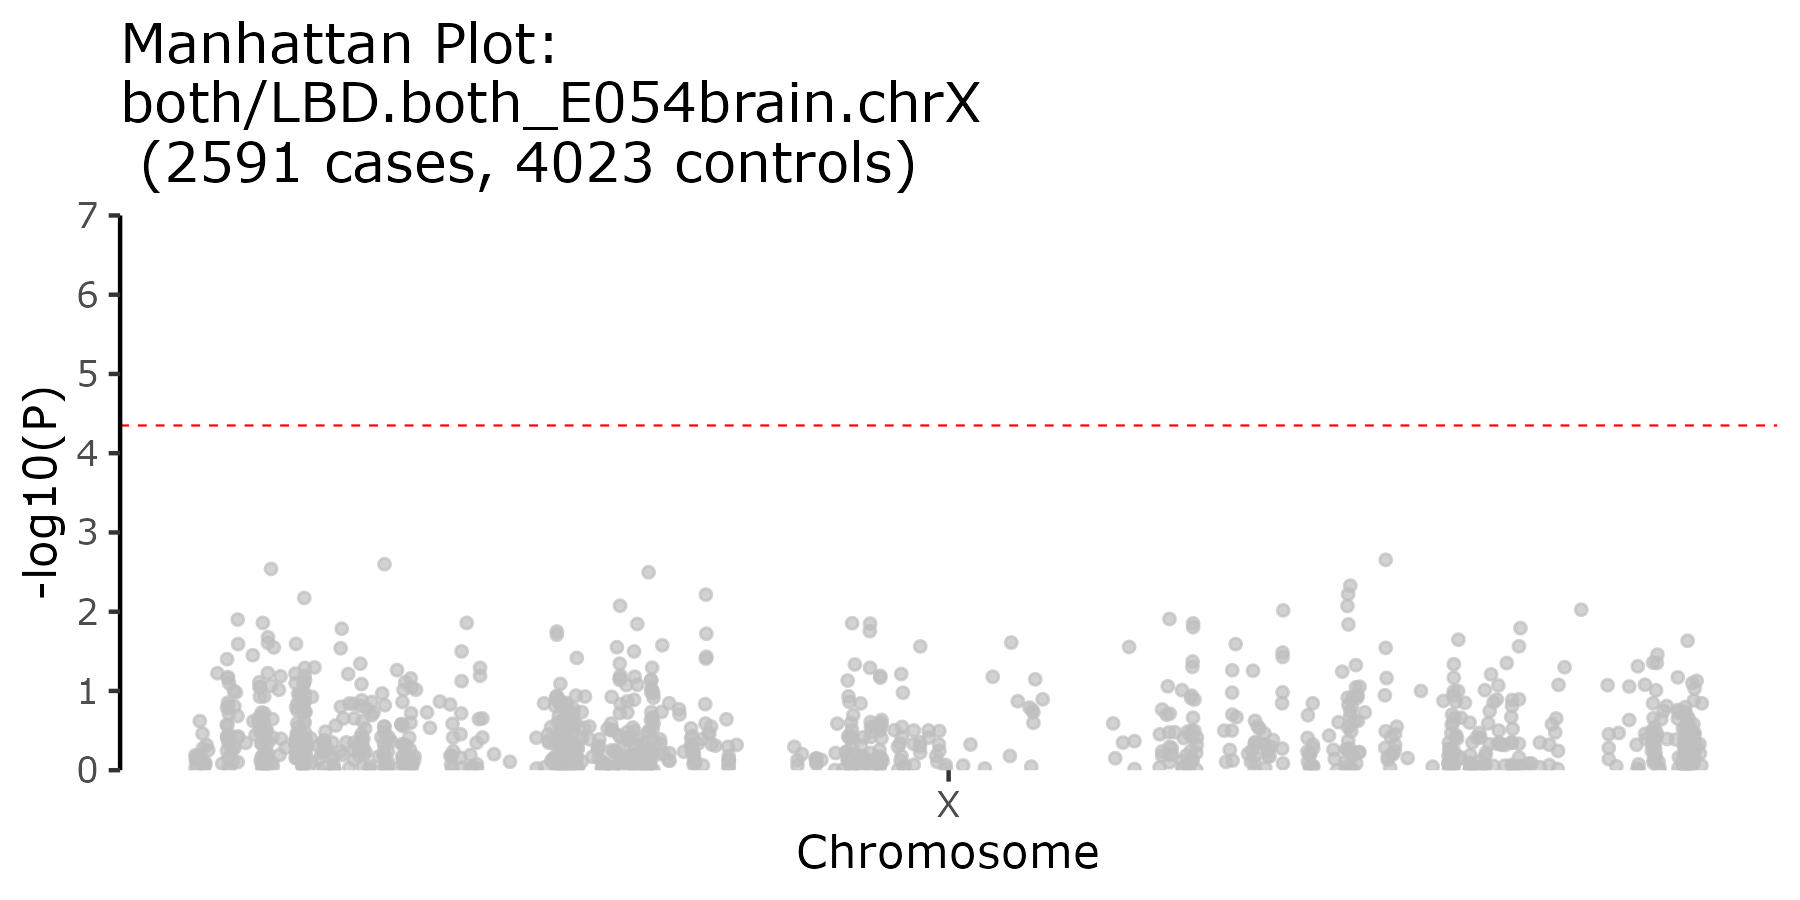

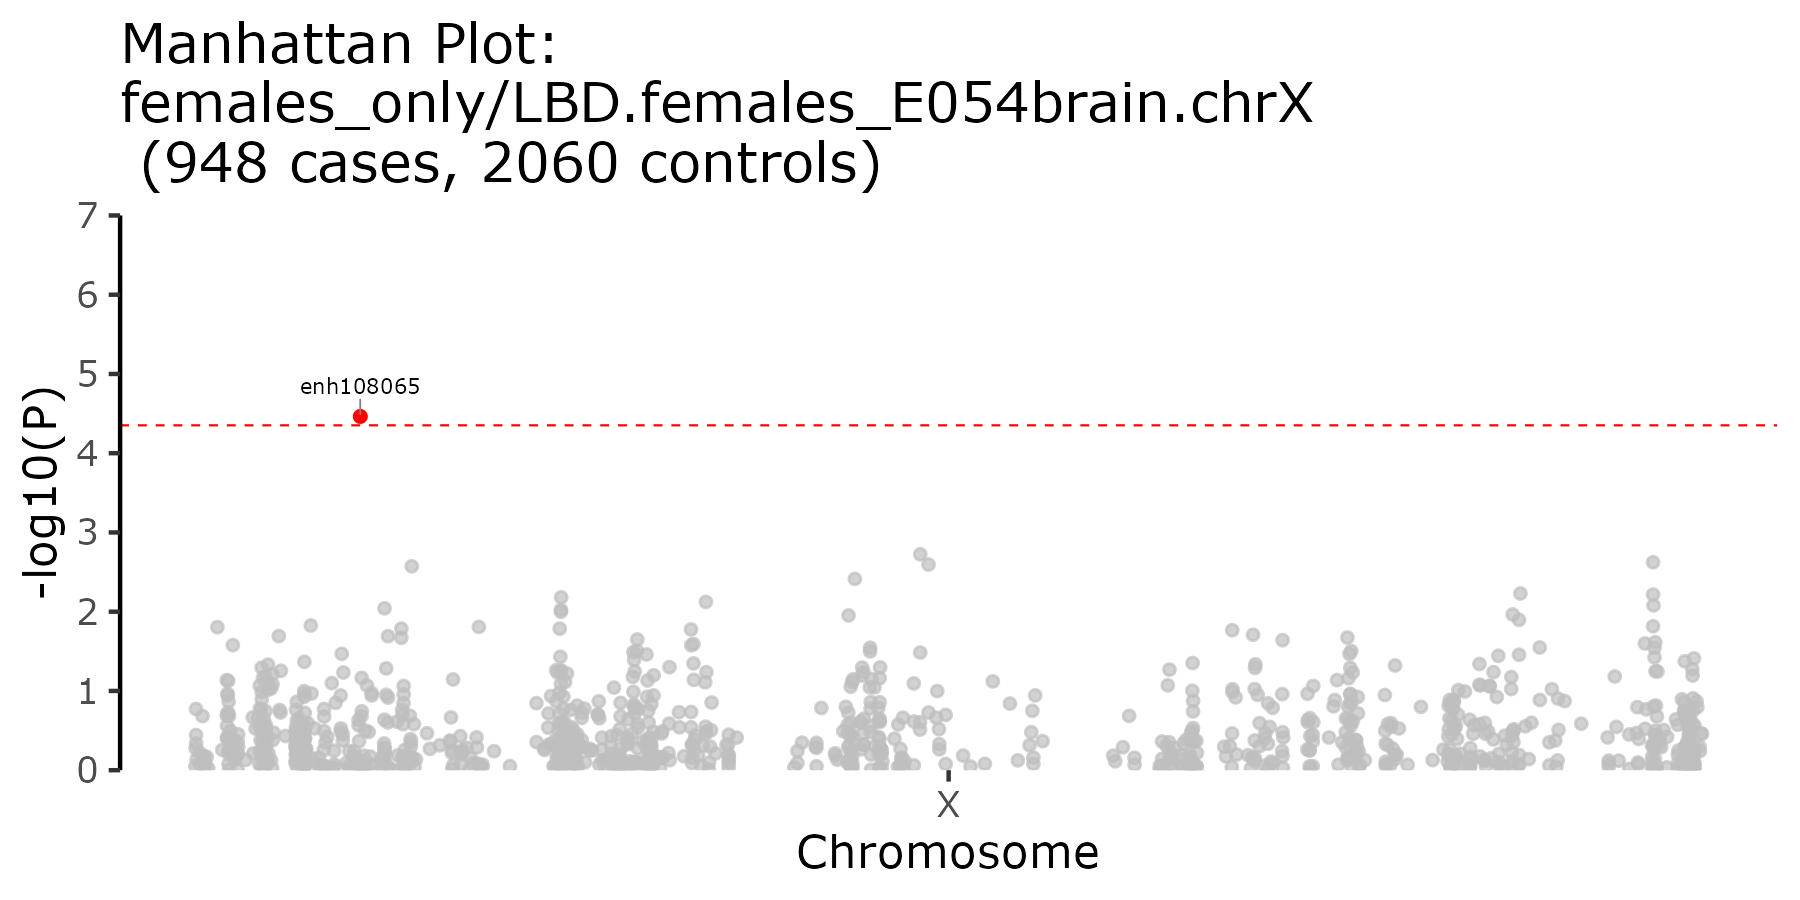

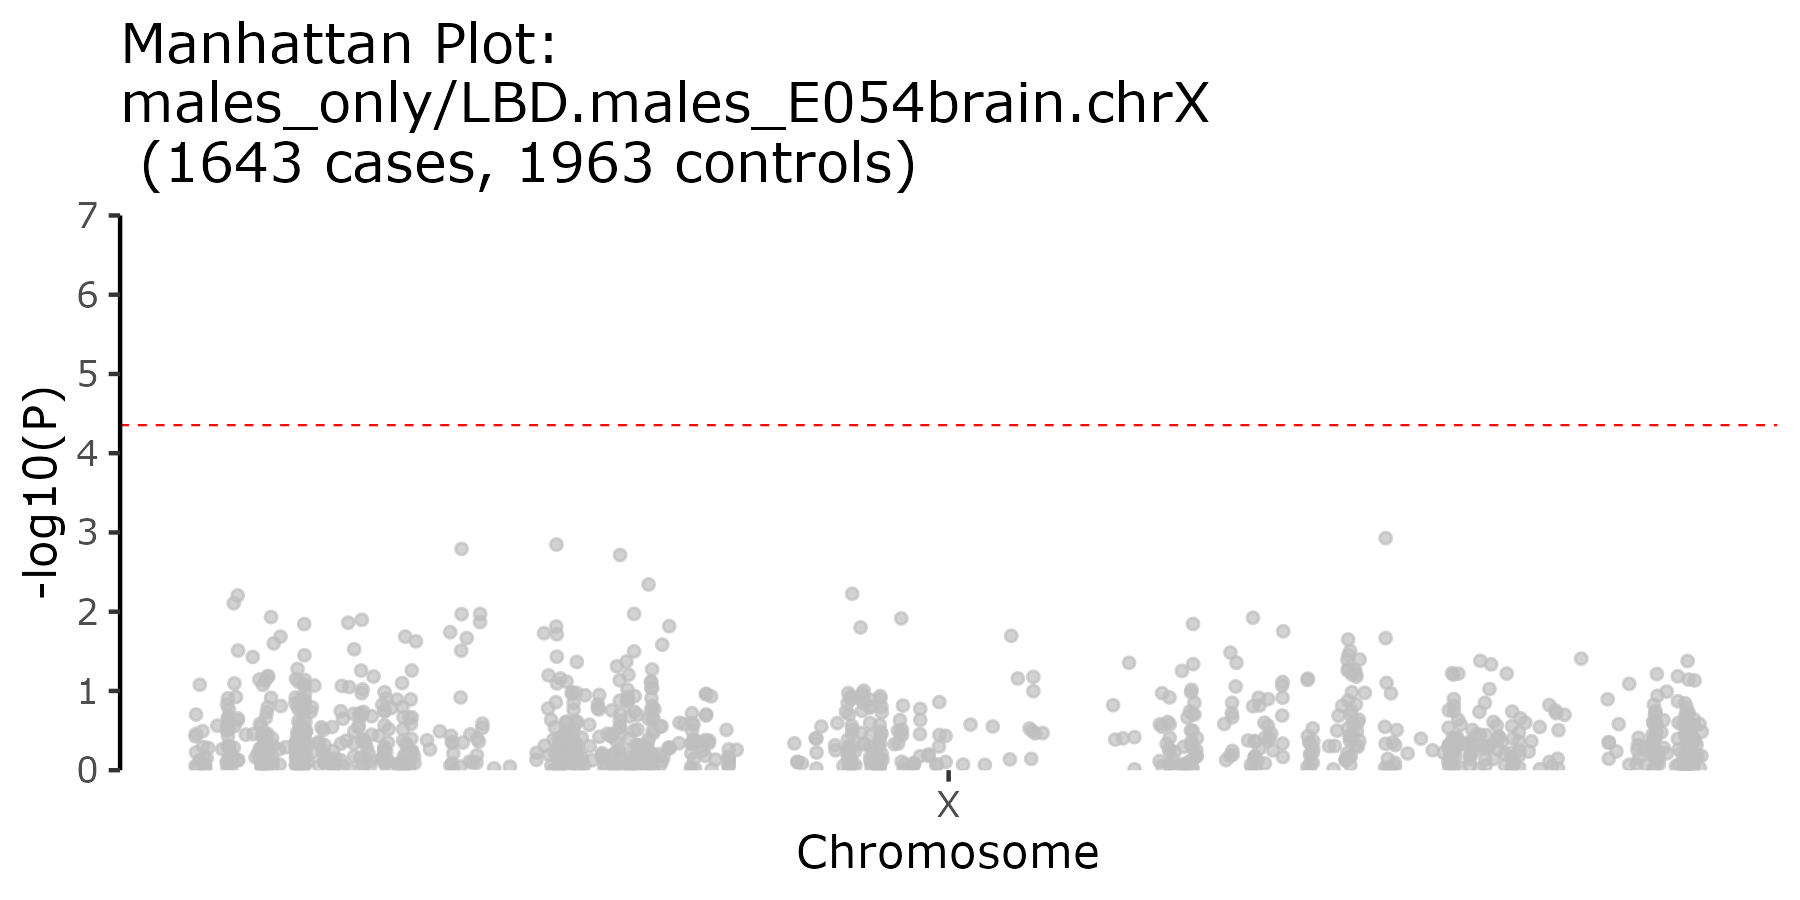

In [55]:
from IPython.display import display
from PIL import Image

print("Manhattan and QQ plots for XWAS analysis (maf overall > 0.01)")

manhattan="RWAS_redo/both/LBD.both_E054brain.chrX.manhattan_v1.jpeg"
display(Image.open(manhattan))

manhattan="RWAS_redo/females_only/LBD.females_E054brain.chrX.manhattan_v1.jpeg"
display(Image.open(manhattan))

manhattan="RWAS_redo/males_only/LBD.males_E054brain.chrX.manhattan_v1.jpeg"
display(Image.open(manhattan))


Manhattan and QQ plots for XWAS analysis (maf overall > 0.01)


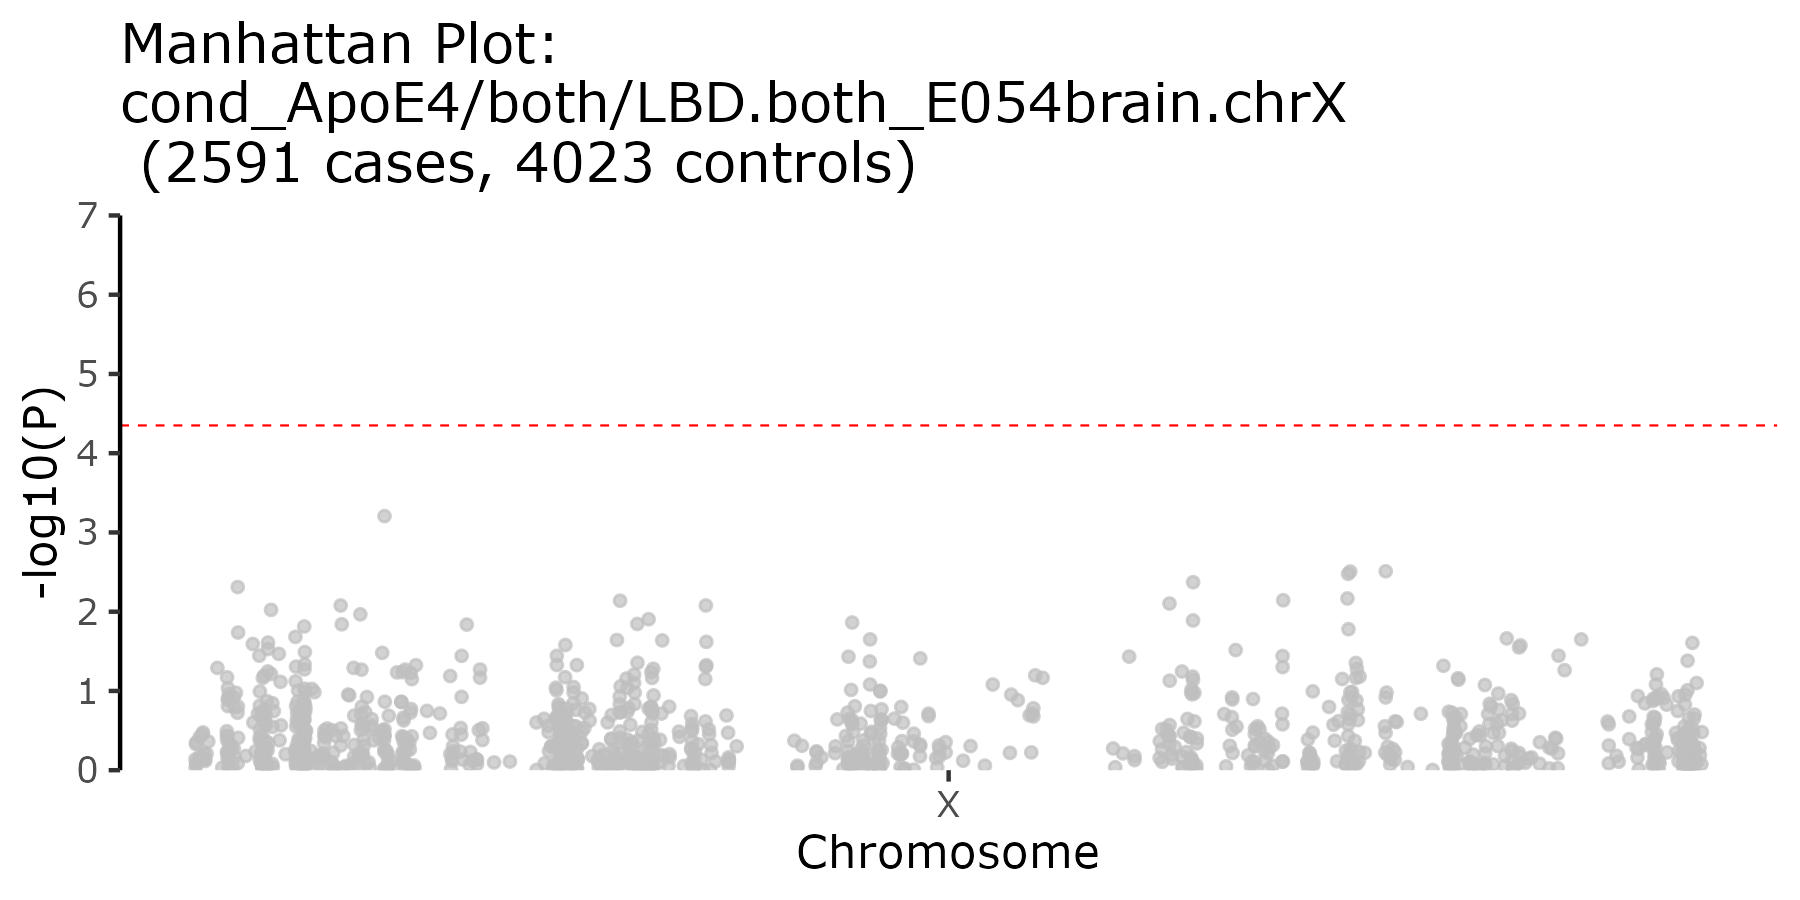

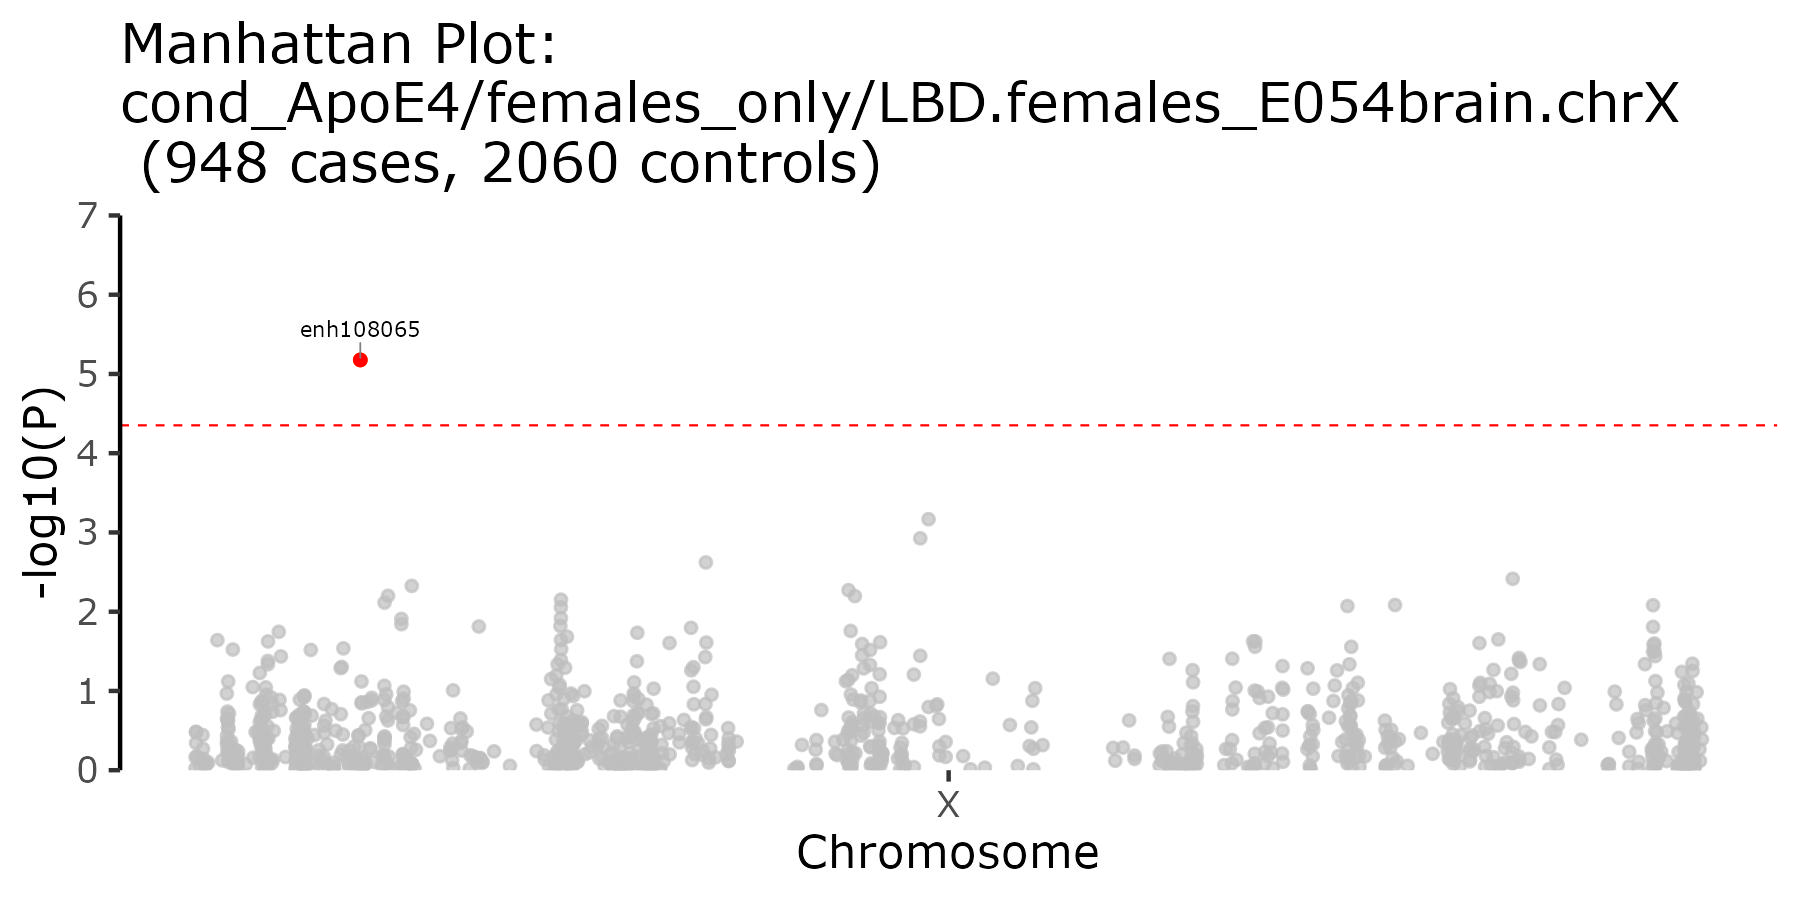

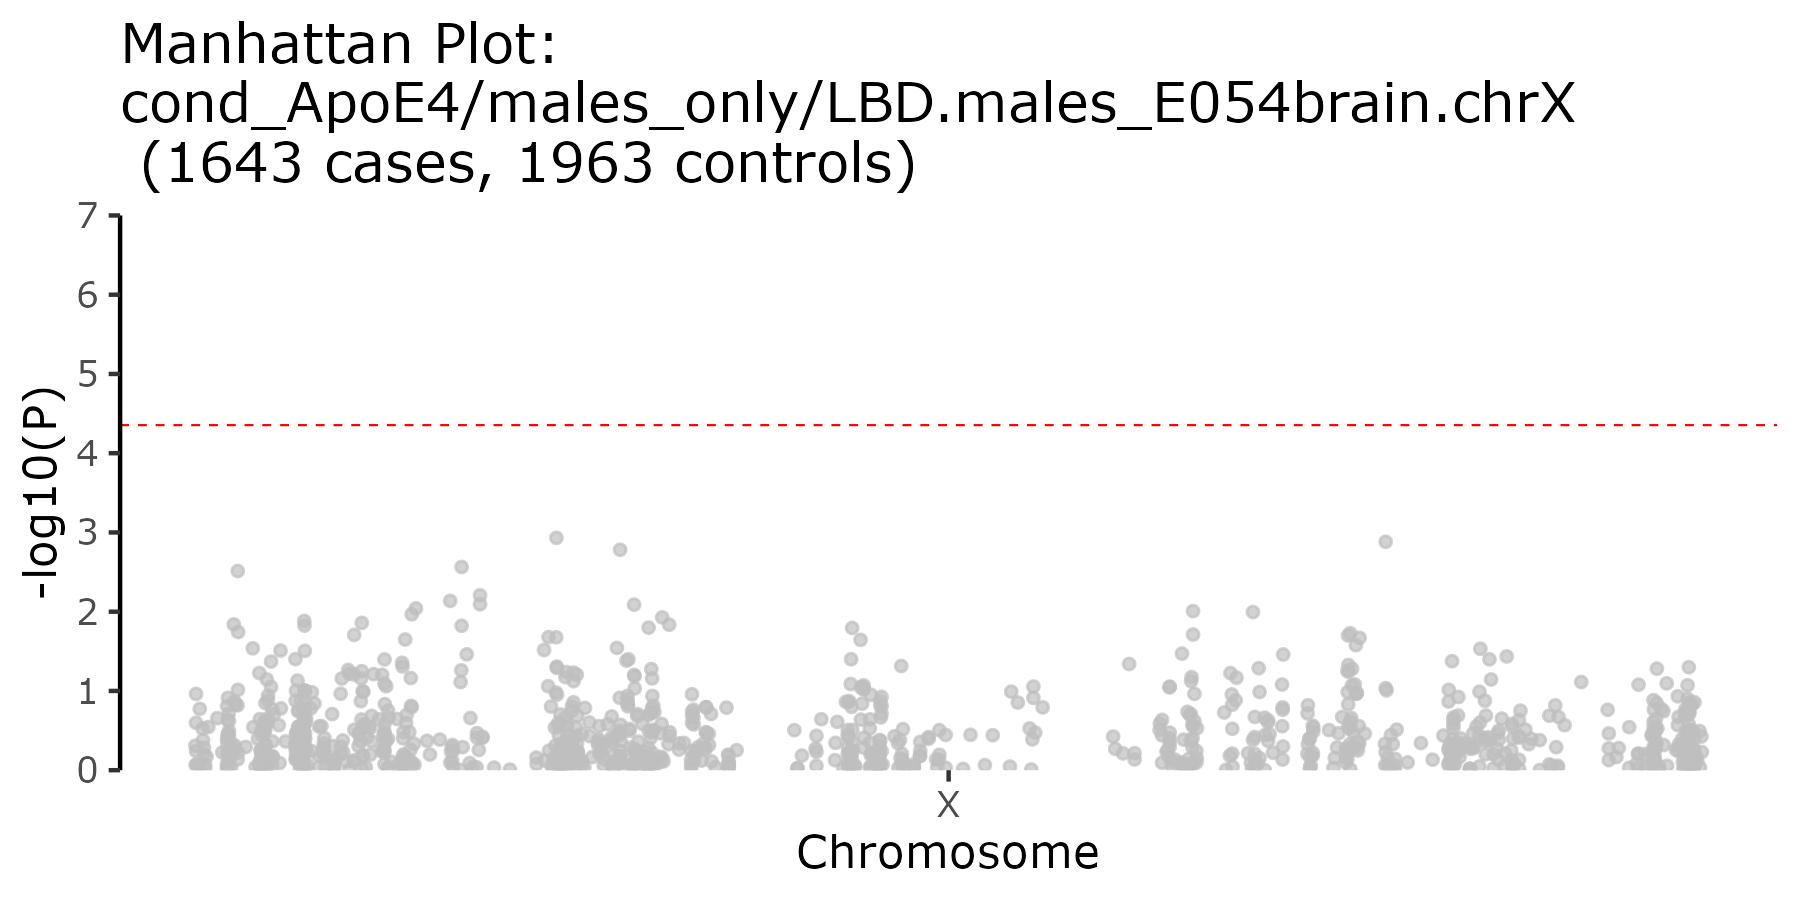

In [56]:
from IPython.display import display
from PIL import Image

print("Manhattan and QQ plots for XWAS analysis (maf overall > 0.01)")

manhattan="RWAS_redo/cond_ApoE4/both/LBD.both_E054brain.chrX.manhattan_v1.jpeg"
display(Image.open(manhattan))

manhattan="RWAS_redo/cond_ApoE4/females_only/LBD.females_E054brain.chrX.manhattan_v1.jpeg"
display(Image.open(manhattan))

manhattan="RWAS_redo/cond_ApoE4/males_only/LBD.males_E054brain.chrX.manhattan_v1.jpeg"
display(Image.open(manhattan))


### replot RWAS results - miami plots

RWAS positive results for `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/cond_ApoE4/females_only/SNPs_associationtest_covarmode_LBD_E054brain.chrX.genes.out.txt`

> Number of mapped enhancers = 1124

> Bonferroni threshold for E054brain = 4.448398576512456e-05

> Number of significant mapped enhancers = 1


Script to plot: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_both.R`


```R
#!/usr/bin/env Rscript

# read command line
args <- commandArgs(trailingOnly=TRUE)
if (length(args) != 6) {
    stop("USAGE: Rscript QQ_manhattan_Miami_plots_RWAS_both.R summstat_xwas summstat_rwas NumberOfCases NumberOfControls outputName MAFcutoff")
}

# Load in required libraries
library(biomaRt)
library(tidyverse)
library(stringr)
library("ggrepel")
require("data.table")
library(viridis)
library(gridExtra)
library(grid)


# set variables
summstat_xwas <- args[1]
summstat_rwas <- args[2]
NumberOfCases <- as.integer(args[3])
NumberOfControls <- as.integer(args[4])
outputName <- args[5]
MAFcutoff <- as.numeric(args[6])

# read in data
print("Reading in xwas glm files and filtering MAF")
xwas <- fread(summstat_xwas,header=F)
colnames(xwas) <- c("MarkerName","Allele1","Allele2","A1_FREQ","FreqSE","MinFreq","MaxFreq","BETA","StdErr","P","Direction","HetISq","HetChiSq","HetDf","HetPVal","CHROM","POS","REF","ALT")

xwas <- subset(xwas, xwas$A1_FREQ > as.numeric(MAFcutoff) &
                      xwas$A1_FREQ < (1-as.numeric(MAFcutoff))) %>%
        filter(P != is.na(P)) %>%
        filter(BETA > -5 & BETA < 5) %>%
        filter(!is.na(BETA)) %>%
        mutate(Analysis = "XWAS",
              ID = MarkerName)



# Read in RWAS result file
print("Reading in rwas files")
rwas <- fread(summstat_rwas,header=T) %>% mutate(Analysis = "RWAS")
colnames(rwas)
colnames(rwas)[2] <- "CHROM"
colnames(rwas)[3] <- "POS"
colnames(rwas)[9] <- "P"

## set rwas threshold according to the number of enhancers in rwas results
## i.e 0.05/number of enhancer regions
## get number of genes in clean dataset

num_enh_region <- dim(rwas)[1]
p_threshold_rwas <- -log10(0.05/dim(rwas)[1])

print(paste("Number of mapped enhancers = ", num_enh_region, sep=""))
print(paste("Bonferroni threshold = ",p_threshold_rwas,sep=""))

## set xwas threshold
p_threshold_xwas <- -log10(0.05/6296)


# merge xwas and rwas results - will need this to match get BPcum on the same scale/coordinates for plotting
xwas_temp <- xwas %>% select(CHROM,POS,Analysis)
rwas_temp <- rwas %>% select(CHROM,POS,Analysis)
data0 <- rbind(xwas_temp,rwas_temp) %>% arrange(CHROM,POS)

# Prepare data for manhattan plot
don <- data0 %>%
## Compute chromosome size
group_by(CHROM) %>%
summarise(chr_len=max(POS)) %>%
## Calculate cumulative position of each chromosome
mutate(tot=cumsum(as.numeric(chr_len))-chr_len) %>%
select(-chr_len) %>%
## Add this info to the initial dataset
left_join(data0, ., by=c("CHROM"="CHROM")) %>%
## Add a cumulative position of each SNP
arrange(CHROM, POS) %>%
mutate( BPcum=POS+tot)


# split data0 back to xwas and rwas datasets
xwas_tidy <- merge(xwas,don,by=c("CHROM","POS","Analysis"),all.x=T) %>%
             ## Add highlight and annotation information
             mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold_xwas, "yes", "no")) %>%
             mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold_xwas-1, "yes", "no")) %>%
             mutate( is_annotate=ifelse(-log10(P)>= p_threshold_xwas-1, "yes", "no"))  

rwas_tidy <- merge(rwas,don,by=c("CHROM","POS","Analysis"),all.x=T) %>%
             ## Add highlight and annotation information
             mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold_rwas, "yes", "no")) %>%
             mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold_rwas-1, "yes", "no")) %>%
             mutate( is_annotate=ifelse(-log10(P)>= p_threshold_rwas-1, "yes", "no"))            
            
            
# Prepare axis split by chrom
axisdf = don %>% group_by(CHROM) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

# Setting axis limits - such that it will always be in increment of 5 on the y-axis
library(plyr)
#y_max = round_any(ceiling(-log10(min(don$P)))+1, 5, f = ceiling)
y_max = 7
detach("package:plyr", unload=TRUE)


# Graph manhattan plot i.e. plot_v0 for RWAS
options(repr.plot.width = 9, repr.plot.height = 1.2)
plot_v0 <- ggplot(rwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="top") +
            scale_y_reverse(limits = c(y_max,0), breaks = seq(y_max,0), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            theme(plot.title = element_text(face = "bold", size = 3)) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(rwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(rwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_point(data=subset(rwas_tidy, don$PassCOLOCPP4 =="yes"), shape=5, fill=NA, size=0.7) +
            geom_hline(yintercept = p_threshold_rwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            geom_label_repel( data=subset(rwas_tidy, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=GENE),
                             size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA",
                             label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
            theme_bw() +
            theme(axis.text.x = element_blank(),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_blank()) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(-12, 2, 25, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)


# Graph manhattan plot i.e. plot_v1 for GWAS data (top)
options(repr.plot.width = 9, repr.plot.height = 1.2)
plot_v1 <- ggplot(xwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="bottom" ) +
            scale_y_continuous(limits = c(0,y_max), breaks = seq(0, y_max), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(xwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(xwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_hline(yintercept = p_threshold_xwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            geom_label_repel( data=subset(xwas_tidy, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=ID),
                             size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA",
                             label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
            theme_bw() +
            theme(axis.text.x = element_text(color = "black", size = 6, face = "plain", vjust=0.5),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_text(face = "bold", size = 8)) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(2, 2, 0, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)

blank <- grid.rect(gp=gpar(col="white"))
all <- grid.arrange(plot_v1,plot_v0, ncol = 1)

# Save Manhattan plot
ggsave(paste(outputName,".miami.manhattan_v1.jpeg", sep = ""), plot = all, device = "jpeg", scale = 1, width = 6, height = 3, units = "in", dpi = 300, limitsize = TRUE)
ggsave(paste(outputName,".miami.manhattan_v1.eps", sep = ""), plot = all, device = "eps", scale = 1, width = 6, height = 3, units = "in", dpi = 300, limitsize = TRUE)
```

Alt script to plot sexstrat results: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/QQ_manhattan_Miami_plots_RWAS.R`


```R
#!/usr/bin/env Rscript

# read command line
args <- commandArgs(trailingOnly=TRUE)
if (length(args) != 6) {
    stop("USAGE: Rscript QQ_manhattan_Miami_plots_RWAS.R summstat_xwas summstat_rwas NumberOfCases NumberOfControls outputName MAFcutoff")
}

# Load in required libraries
library(biomaRt)
library(tidyverse)
library(stringr)
library("ggrepel")
require("data.table")
library(viridis)
library(gridExtra)
library(grid)


# set variables
summstat_xwas <- args[1]
summstat_rwas <- args[2]
NumberOfCases <- as.integer(args[3])
NumberOfControls <- as.integer(args[4])
outputName <- args[5]
MAFcutoff <- as.numeric(args[6])

# read in data
print("Reading in xwas glm files and filtering MAF")
xwas <- fread(summstat_xwas,header=T) %>%
        rename(A1_FREQ = Freq_EffectAllele)

xwas <- subset(xwas, xwas$A1_FREQ > as.numeric(MAFcutoff) &
                      xwas$A1_FREQ < (1-as.numeric(MAFcutoff))) %>%
        filter(P != is.na(P)) %>%
        filter(BETA > -5 & BETA < 5) %>%
        filter(!is.na(BETA)) %>%
        mutate(Analysis = "XWAS")


# Read in RWAS result file
print("Reading in rwas files")
rwas <- fread(summstat_rwas,header=T) %>% mutate(Analysis = "RWAS")
colnames(rwas)
colnames(rwas)[2] <- "CHROM"
colnames(rwas)[3] <- "POS"
colnames(rwas)[9] <- "P"

## set rwas threshold according to the number of enhancers in rwas results
## i.e 0.05/number of enhancer regions
## get number of genes in clean dataset

num_enh_region <- dim(rwas)[1]
p_threshold_rwas <- -log10(0.05/dim(rwas)[1])

print(paste("Number of mapped enhancers = ", num_enh_region, sep=""))
print(paste("Bonferroni threshold = ",p_threshold_rwas,sep=""))

## set xwas threshold
p_threshold_xwas <- -log10(0.05/6296)


# merge xwas and rwas results - will need this to match get BPcum on the same scale/coordinates for plotting
xwas_temp <- xwas %>% select(CHROM,POS,Analysis)
rwas_temp <- rwas %>% select(CHROM,POS,Analysis)
data0 <- rbind(xwas_temp,rwas_temp) %>% arrange(CHROM,POS)

# Prepare data for manhattan plot
don <- data0 %>%
## Compute chromosome size
group_by(CHROM) %>%
summarise(chr_len=max(POS)) %>%
## Calculate cumulative position of each chromosome
mutate(tot=cumsum(as.numeric(chr_len))-chr_len) %>%
select(-chr_len) %>%
## Add this info to the initial dataset
left_join(data0, ., by=c("CHROM"="CHROM")) %>%
## Add a cumulative position of each SNP
arrange(CHROM, POS) %>%
mutate( BPcum=POS+tot)


# split data0 back to xwas and rwas datasets
xwas_tidy <- merge(xwas,don,by=c("CHROM","POS","Analysis"),all.x=T) %>%
             ## Add highlight and annotation information
             mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold_xwas, "yes", "no")) %>%
             mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold_xwas-1, "yes", "no")) %>%
             mutate( is_annotate=ifelse(-log10(P)>= p_threshold_xwas-1, "yes", "no"))  

rwas_tidy <- merge(rwas,don,by=c("CHROM","POS","Analysis"),all.x=T) %>%
             ## Add highlight and annotation information
             mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold_rwas, "yes", "no")) %>%
             mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold_rwas-1, "yes", "no")) %>%
             mutate( is_annotate=ifelse(-log10(P)>= p_threshold_rwas-1, "yes", "no"))            
            
            
# Prepare axis split by chrom
axisdf = don %>% group_by(CHROM) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

# Setting axis limits - such that it will always be in increment of 5 on the y-axis
library(plyr)
#y_max = round_any(ceiling(-log10(min(don$P)))+1, 5, f = ceiling)
y_max = 7
detach("package:plyr", unload=TRUE)


# Graph manhattan plot i.e. plot_v0 for RWAS
options(repr.plot.width = 9, repr.plot.height = 1.2)
plot_v0 <- ggplot(rwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="top") +
            scale_y_reverse(limits = c(y_max,0), breaks = seq(y_max,0), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            theme(plot.title = element_text(face = "bold", size = 3)) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(rwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(rwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_point(data=subset(rwas_tidy, don$PassCOLOCPP4 =="yes"), shape=5, fill=NA, size=0.7) +
            geom_hline(yintercept = p_threshold_rwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            geom_label_repel( data=subset(rwas_tidy, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=GENE),
                             size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA",
                             label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
            theme_bw() +
            theme(axis.text.x = element_blank(),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_blank()) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(-12, 2, 25, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)


# Graph manhattan plot i.e. plot_v1 for GWAS data (top)
options(repr.plot.width = 9, repr.plot.height = 1.2)
plot_v1 <- ggplot(xwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="bottom" ) +
            scale_y_continuous(limits = c(0,y_max), breaks = seq(0, y_max), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(xwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(xwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_hline(yintercept = p_threshold_xwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            geom_label_repel( data=subset(xwas_tidy, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=ID),
                             size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA",
                             label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
            theme_bw() +
            theme(axis.text.x = element_text(color = "black", size = 6, face = "plain", vjust=0.5),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_text(face = "bold", size = 8)) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(2, 2, 0, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)

blank <- grid.rect(gp=gpar(col="white"))
all <- grid.arrange(plot_v1,plot_v0, ncol = 1)

# Save Manhattan plot
ggsave(paste(outputName,".miami.manhattan_v1.jpeg", sep = ""), plot = all, device = "jpeg", scale = 1, width = 6, height = 3, units = "in", dpi = 300, limitsize = TRUE)
ggsave(paste(outputName,".miami.manhattan_v1.eps", sep = ""), plot = all, device = "eps", scale = 1, width = 6, height = 3, units = "in", dpi = 300, limitsize = TRUE)
```

In [57]:
%%bash
cd RWAS_redo

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"

module load R/4.3

cohort="both"
CASES="2591"
CONTROLS="4023"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/${cohort}/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}/LBD.${cohort}_${line}.chrX \
0.01
done

cohort="females"
CASES="948"
CONTROLS="2060"
cat ${WORKING_DIR}/RWAS/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}_only/LBD.${cohort}_${line}.chrX \
0.01
done

cohort="males"
CASES="1643"
CONTROLS="1963"
cat ${WORKING_DIR}/RWAS/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}_only/LBD.${cohort}_${line}.chrX \
0.01
done

[-] Unloading gcc  11.3.0  ... 
[-] Unloading HDF5  1.12.2 
[-] Unloading netcdf  4.9.0 
[-] Unloading openmpi/4.1.3/gcc-11.3.0  ... 
[-] Unloading pandoc  2.18  on cn2294 
[-] Unloading R 4.3.0 
[+] Loading gcc  11.3.0  ... 
[+] Loading HDF5  1.12.2 
[+] Loading netcdf  4.9.0 
[-] Unloading gcc  11.3.0  ... 
[+] Loading gcc  11.3.0  ... 
[+] Loading openmpi/4.1.3/gcc-11.3.0  ... 
[+] Loading pandoc  2.18  on cn2294 
[+] Loading R 4.3.0 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks biomaRt::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 808"
[1] "Bonferroni threshold = 4.20844135643857"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1119"
[1] "Bonferroni threshold = 4.34986008219233"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1835"
[1] "Bonferroni threshold = 4.56466606425209"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1847"
[1] "Bonferroni threshold = 4.56749689110422"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 928"
[1] "Bonferroni threshold = 4.26857797188284"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1525"
[1] "Bonferroni threshold = 4.48429983934679"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1814"
[1] "Bonferroni threshold = 4.55966727838806"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1792"
[1] "Bonferroni threshold = 4.55436800099009"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1785"
[1] "Bonferroni threshold = 4.55266821611219"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 933"
[1] "Bonferroni threshold = 4.27091163941048"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 884"
[1] "Bonferroni threshold = 4.24748226067705"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1661"
[1] "Bonferroni threshold = 4.52139962811538"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 810"
[1] "Bonferroni threshold = 4.20951501454263"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1124"
[1] "Bonferroni threshold = 4.35179630689702"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1842"
[1] "Bonferroni threshold = 4.56631962152481"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1852"
[1] "Bonferroni threshold = 4.5686709780099"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 930"
[1] "Bonferroni threshold = 4.26951294421792"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1528"
[1] "Bonferroni threshold = 4.48515334990365"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1815"
[1] "Bonferroni threshold = 4.55990662503611"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1801"
[1] "Bonferroni threshold = 4.55654370848351"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1789"
[1] "Bonferroni threshold = 4.55364033623135"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 936"
[1] "Bonferroni threshold = 4.27230584440209"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 888"
[1] "Bonferroni threshold = 4.24944296144258"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1669"
[1] "Bonferroni threshold = 4.52348633234323"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 808"
[1] "Bonferroni threshold = 4.20844135643857"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1130"
[1] "Bonferroni threshold = 4.3541084391474"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1838"
[1] "Bonferroni threshold = 4.56537550271407"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1849"
[1] "Bonferroni threshold = 4.56796690682315"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 934"
[1] "Bonferroni threshold = 4.27137687189407"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1530"
[1] "Bonferroni threshold = 4.48572142648158"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1818"
[1] "Bonferroni threshold = 4.56062387454993"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1791"
[1] "Bonferroni threshold = 4.55412558151301"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1787"
[1] "Bonferroni threshold = 4.55315454816963"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 937"
[1] "Bonferroni threshold = 4.27276958655176"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 891"
[1] "Bonferroni threshold = 4.25090769970086"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1659"
[1] "Bonferroni threshold = 4.52087638168834"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page


In [58]:
%%bash
cd RWAS_redo

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"

module load R/4.3

cohort="both"
CASES="2591"
CONTROLS="4023"
cat ${WORKING_DIR}/RWAS_redo/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}/LBD.${cohort}_${line}.chrX \
0.01
done

cohort="females"
CASES="948"
CONTROLS="2060"
cat ${WORKING_DIR}/RWAS/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}_only/LBD.${cohort}_${line}.chrX \
0.01
done

cohort="males"
CASES="1643"
CONTROLS="1963"
cat ${WORKING_DIR}/RWAS/enhancer_brain_tissue_names.txt | while read line
do
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}_only/LBD.${cohort}_${line}.chrX \
0.01
done

[-] Unloading gcc  11.3.0  ... 
[-] Unloading HDF5  1.12.2 
[-] Unloading netcdf  4.9.0 
[-] Unloading openmpi/4.1.3/gcc-11.3.0  ... 
[-] Unloading pandoc  2.18  on cn2294 
[-] Unloading R 4.3.0 
[+] Loading gcc  11.3.0  ... 
[+] Loading HDF5  1.12.2 
[+] Loading netcdf  4.9.0 
[-] Unloading gcc  11.3.0  ... 
[+] Loading gcc  11.3.0  ... 
[+] Loading openmpi/4.1.3/gcc-11.3.0  ... 
[+] Loading pandoc  2.18  on cn2294 
[+] Loading R 4.3.0 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks biomaRt::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 809"
[1] "Bonferroni threshold = 4.20897851727625"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1120"
[1] "Bonferroni threshold = 4.35024801833416"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1836"
[1] "Bonferroni threshold = 4.5649026725292"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1845"
[1] "Bonferroni threshold = 4.56702636615906"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 929"
[1] "Bonferroni threshold = 4.26904570965762"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1525"
[1] "Bonferroni threshold = 4.48429983934679"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1815"
[1] "Bonferroni threshold = 4.55990662503611"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1793"
[1] "Bonferroni threshold = 4.55461028522616"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1783"
[1] "Bonferroni threshold = 4.55218133883934"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 933"
[1] "Bonferroni threshold = 4.27091163941048"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 885"
[1] "Bonferroni threshold = 4.24797326636181"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1660"
[1] "Bonferroni threshold = 4.52113808370404"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 810"
[1] "Bonferroni threshold = 4.20951501454263"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1124"
[1] "Bonferroni threshold = 4.35179630689702"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1842"
[1] "Bonferroni threshold = 4.56631962152481"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1846"
[1] "Bonferroni threshold = 4.56726169235387"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1852"
[1] "Bonferroni threshold = 4.5686709780099"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 930"
[1] "Bonferroni threshold = 4.26951294421792"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1528"
[1] "Bonferroni threshold = 4.48515334990365"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1815"
[1] "Bonferroni threshold = 4.55990662503611"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1801"
[1] "Bonferroni threshold = 4.55654370848351"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1789"
[1] "Bonferroni threshold = 4.55364033623135"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 936"
[1] "Bonferroni threshold = 4.27230584440209"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 888"
[1] "Bonferroni threshold = 4.24944296144258"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1669"
[1] "Bonferroni threshold = 4.52348633234323"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 807"
[1] "Bonferroni threshold = 4.20790353038605"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1130"
[1] "Bonferroni threshold = 4.3541084391474"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1840"
[1] "Bonferroni threshold = 4.56584781867352"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1848"
[1] "Bonferroni threshold = 4.56773196254807"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1850"
[1] "Bonferroni threshold = 4.56820172406699"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 934"
[1] "Bonferroni threshold = 4.27137687189407"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1530"
[1] "Bonferroni threshold = 4.48572142648158"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1819"
[1] "Bonferroni threshold = 4.56086269472747"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1792"
[1] "Bonferroni threshold = 4.55436800099009"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1789"
[1] "Bonferroni threshold = 4.55364033623135"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 937"
[1] "Bonferroni threshold = 4.27276958655176"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 891"
[1] "Bonferroni threshold = 4.25090769970086"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
── Attaching core tid

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1659"
[1] "Bonferroni threshold = 4.52087638168834"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page


### replot GWAS-RWAS miami plots for publication

Script to plot publication quality plots: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_both_forPub.R`


```R
#!/usr/bin/env Rscript

# read command line
args <- commandArgs(trailingOnly=TRUE)
if (length(args) != 6) {
    stop("USAGE: Rscript QQ_manhattan_Miami_plots_RWAS.R summstat_xwas summstat_rwas NumberOfCases NumberOfControls outputName MAFcutoff")
}

# Load in required libraries
library(biomaRt)
library(tidyverse)
library(stringr)
library("ggrepel")
require("data.table")
library(viridis)
library(gridExtra)
library(grid)


# set variables
summstat_xwas <- args[1]
summstat_rwas <- args[2]
NumberOfCases <- as.integer(args[3])
NumberOfControls <- as.integer(args[4])
outputName <- args[5]
MAFcutoff <- as.numeric(args[6])

# read in data
print("Reading in xwas glm files and filtering MAF")
xwas <- fread(summstat_xwas,header=F)
colnames(xwas) <- c("MarkerName","Allele1","Allele2","A1_FREQ","FreqSE","MinFreq","MaxFreq","BETA","StdErr","P","Direction","HetISq","HetChiSq","HetDf","HetPVal","CHROM","POS","REF","ALT")

xwas <- subset(xwas, xwas$A1_FREQ > as.numeric(MAFcutoff) &
                      xwas$A1_FREQ < (1-as.numeric(MAFcutoff))) %>%
        filter(P != is.na(P)) %>%
        filter(BETA > -5 & BETA < 5) %>%
        filter(!is.na(BETA)) %>%
        mutate(Analysis = "XWAS",
              ID = MarkerName)


# Read in RWAS result file
print("Reading in rwas files")
rwas <- fread(summstat_rwas,header=T) %>% mutate(Analysis = "RWAS")
colnames(rwas)
colnames(rwas)[2] <- "CHROM"
colnames(rwas)[3] <- "POS"
colnames(rwas)[9] <- "P"

## set rwas threshold according to the number of enhancers in rwas results
## i.e 0.05/number of enhancer regions
## get number of genes in clean dataset

num_enh_region <- dim(rwas)[1]
p_threshold_rwas <- -log10(0.05/dim(rwas)[1])

print(paste("Number of mapped enhancers = ", num_enh_region, sep=""))
print(paste("Bonferroni threshold = ",p_threshold_rwas,sep=""))

## set xwas threshold
p_threshold_xwas <- -log10(0.05/6296)


# merge xwas and rwas results - will need this to match get BPcum on the same scale/coordinates for plotting
xwas_temp <- xwas %>% select(CHROM,POS,Analysis)
rwas_temp <- rwas %>% select(CHROM,POS,Analysis)
data0 <- rbind(xwas_temp,rwas_temp) %>% arrange(CHROM,POS)

# Prepare data for manhattan plot
don <- data0 %>%
## Compute chromosome size
group_by(CHROM) %>%
summarise(chr_len=max(POS)) %>%
## Calculate cumulative position of each chromosome
mutate(tot=cumsum(as.numeric(chr_len))-chr_len) %>%
select(-chr_len) %>%
## Add this info to the initial dataset
left_join(data0, ., by=c("CHROM"="CHROM")) %>%
## Add a cumulative position of each SNP
arrange(CHROM, POS) %>%
mutate( BPcum=POS+tot)


# split data0 back to xwas and rwas datasets
xwas_tidy <- merge(xwas,don,by=c("CHROM","POS","Analysis"),all.x=T) %>%
             ## Add highlight and annotation information
             mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold_xwas, "yes", "no")) %>%
             mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold_xwas-1, "yes", "no")) %>%
             mutate( is_annotate=ifelse(-log10(P)>= p_threshold_xwas-1, "yes", "no"))

rwas_tidy <- merge(rwas,don,by=c("CHROM","POS","Analysis"),all.x=T) %>%
             ## Add highlight and annotation information
             mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold_rwas, "yes", "no")) %>%
             mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold_rwas-1, "yes", "no")) %>%
             mutate( is_annotate=ifelse(-log10(P)>= p_threshold_rwas-1, "yes", "no"))


# Prepare axis split by chrom
axisdf = don %>% group_by(CHROM) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

# Setting axis limits - such that it will always be in increment of 5 on the y-axis
library(plyr)
#y_max = round_any(ceiling(-log10(min(don$P)))+1, 5, f = ceiling)
y_max = 7
detach("package:plyr", unload=TRUE)

### WITH LABELS ###
# Graph manhattan plot i.e. plot_v0 for RWAS
options(repr.plot.width = 9, repr.plot.height = 1.4)
plot_v0 <- ggplot(rwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="top") +
            scale_y_reverse(limits = c(y_max,0), breaks = seq(y_max,0), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            theme(plot.title = element_text(face = "bold", size = 3)) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(rwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(rwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_point(data=subset(rwas_tidy, don$PassCOLOCPP4 =="yes"), shape=5, fill=NA, size=0.7) +
            geom_hline(yintercept = p_threshold_rwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            geom_label_repel( data=subset(rwas_tidy, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=GENE),
                             size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA",
                             label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
            theme_bw() +
            theme(axis.text.x = element_blank(),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_blank()) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(-275, 2, 25, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)


# Graph manhattan plot i.e. plot_v1 for GWAS data (top)
options(repr.plot.width = 9, repr.plot.height = 1.4)
plot_v1 <- ggplot(xwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="bottom" ) +
            scale_y_continuous(limits = c(0,y_max), breaks = seq(0, y_max), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(xwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(xwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_hline(yintercept = p_threshold_xwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            geom_label_repel( data=subset(xwas_tidy, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=ID),
                             size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA",
                             label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
            theme_bw() +
            theme(axis.text.x = element_text(color = "black", size = 6, face = "plain", vjust=0.5),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_text(face = "bold", size = 8)) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(2, 2, 0, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)

blank <- grid.rect(gp=gpar(col="white"))
all <- grid.arrange(plot_v1,plot_v0, ncol = 1)

# Save Manhattan plot
ggsave(paste(outputName,".miami.manhattan_v1.jpeg", sep = ""), plot = all, device = "jpeg", scale = 1, width = 4, height = 6, units = "in", dpi = 300, limitsize = TRUE)
ggsave(paste(outputName,".miami.manhattan_v1.eps", sep = ""), plot = all, device = "eps", scale = 1, width = 4, height = 6, units = "in", dpi = 300, limitsize = TRUE)

### WITHOUT LABELS ###
# Graph manhattan plot i.e. plot_v0 for RWAS
options(repr.plot.width = 9, repr.plot.height = 1.4)
plot_v0 <- ggplot(rwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="top") +
            scale_y_reverse(limits = c(y_max,0), breaks = seq(y_max,0), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            theme(plot.title = element_text(face = "bold", size = 3)) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(rwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(rwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_point(data=subset(rwas_tidy, don$PassCOLOCPP4 =="yes"), shape=5, fill=NA, size=0.7) +
            geom_hline(yintercept = p_threshold_rwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            theme_bw() +
            theme(axis.text.x = element_blank(),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_blank()) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(-275, 2, 25, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)


# Graph manhattan plot i.e. plot_v1 for GWAS data (top)
options(repr.plot.width = 9, repr.plot.height = 1.4)
plot_v1 <- ggplot(xwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="bottom" ) +
            scale_y_continuous(limits = c(0,y_max), breaks = seq(0, y_max), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(xwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(xwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_hline(yintercept = p_threshold_xwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            theme_bw() +
            theme(axis.text.x = element_text(color = "black", size = 6, face = "plain", vjust=0.5),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_text(face = "bold", size = 8)) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(2, 2, 0, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)

blank <- grid.rect(gp=gpar(col="white"))
all <- grid.arrange(plot_v1,plot_v0, ncol = 1)

# Save Manhattan plot
ggsave(paste(outputName,".miami.manhattan_v0.jpeg", sep = ""), plot = all, device = "jpeg", scale = 1, width = 4, height = 6, units = "in", dpi = 300, limitsize = TRUE)
ggsave(paste(outputName,".miami.manhattan_v0.eps", sep = ""), plot = all, device = "eps", scale = 1, width = 4, height = 6, units = "in", dpi = 300, limitsize = TRUE)
```
___

Script to plot publication quality plots for sexstrat analysis: `/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_sexstrat_forPub.R`


```R
#!/usr/bin/env Rscript

# read command line
args <- commandArgs(trailingOnly=TRUE)
if (length(args) != 6) {
    stop("USAGE: Rscript QQ_manhattan_Miami_plots_RWAS.R summstat_xwas summstat_rwas NumberOfCases NumberOfControls outputName MAFcutoff")
}

# Load in required libraries
library(biomaRt)
library(tidyverse)
library(stringr)
library("ggrepel")
require("data.table")
library(viridis)
library(gridExtra)
library(grid)


# set variables
summstat_xwas <- args[1]
summstat_rwas <- args[2]
NumberOfCases <- as.integer(args[3])
NumberOfControls <- as.integer(args[4])
outputName <- args[5]
MAFcutoff <- as.numeric(args[6])

# read in data
print("Reading in xwas glm files and filtering MAF")
xwas <- fread(summstat_xwas,header=T) %>%
        rename(A1_FREQ = Freq_EffectAllele)

xwas <- subset(xwas, xwas$A1_FREQ > as.numeric(MAFcutoff) &
                      xwas$A1_FREQ < (1-as.numeric(MAFcutoff))) %>%
        filter(P != is.na(P)) %>%
        filter(BETA > -5 & BETA < 5) %>%
        filter(!is.na(BETA)) %>%
        mutate(Analysis = "XWAS")

# Read in RWAS result file
print("Reading in rwas files")
rwas <- fread(summstat_rwas,header=T) %>% mutate(Analysis = "RWAS")
colnames(rwas)
colnames(rwas)[2] <- "CHROM"
colnames(rwas)[3] <- "POS"
colnames(rwas)[9] <- "P"

## set rwas threshold according to the number of enhancers in rwas results
## i.e 0.05/number of enhancer regions
## get number of genes in clean dataset

num_enh_region <- dim(rwas)[1]
p_threshold_rwas <- -log10(0.05/dim(rwas)[1])

print(paste("Number of mapped enhancers = ", num_enh_region, sep=""))
print(paste("Bonferroni threshold = ",p_threshold_rwas,sep=""))

## set xwas threshold
p_threshold_xwas <- -log10(0.05/6296)


# merge xwas and rwas results - will need this to match get BPcum on the same scale/coordinates for plotting
xwas_temp <- xwas %>% select(CHROM,POS,Analysis)
rwas_temp <- rwas %>% select(CHROM,POS,Analysis)
data0 <- rbind(xwas_temp,rwas_temp) %>% arrange(CHROM,POS)

# Prepare data for manhattan plot
don <- data0 %>%
## Compute chromosome size
group_by(CHROM) %>%
summarise(chr_len=max(POS)) %>%
## Calculate cumulative position of each chromosome
mutate(tot=cumsum(as.numeric(chr_len))-chr_len) %>%
select(-chr_len) %>%
## Add this info to the initial dataset
left_join(data0, ., by=c("CHROM"="CHROM")) %>%
## Add a cumulative position of each SNP
arrange(CHROM, POS) %>%
mutate( BPcum=POS+tot)


# split data0 back to xwas and rwas datasets
xwas_tidy <- merge(xwas,don,by=c("CHROM","POS","Analysis"),all.x=T) %>%
             ## Add highlight and annotation information
             mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold_xwas, "yes", "no")) %>%
             mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold_xwas-1, "yes", "no")) %>%
             mutate( is_annotate=ifelse(-log10(P)>= p_threshold_xwas-1, "yes", "no"))

rwas_tidy <- merge(rwas,don,by=c("CHROM","POS","Analysis"),all.x=T) %>%
             ## Add highlight and annotation information
             mutate( is_highlight_sig=ifelse(-log10(P)>= p_threshold_rwas, "yes", "no")) %>%
             mutate( is_highlight_subsig=ifelse(-log10(P)>= p_threshold_rwas-1, "yes", "no")) %>%
             mutate( is_annotate=ifelse(-log10(P)>= p_threshold_rwas-1, "yes", "no"))


# Prepare axis split by chrom
axisdf = don %>% group_by(CHROM) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

# Setting axis limits - such that it will always be in increment of 5 on the y-axis
library(plyr)
#y_max = round_any(ceiling(-log10(min(don$P)))+1, 5, f = ceiling)
y_max = 7
detach("package:plyr", unload=TRUE)

### WITH LABEL ###
# Graph manhattan plot i.e. plot_v0 for RWAS
options(repr.plot.width = 9, repr.plot.height = 1.4)
plot_v0 <- ggplot(rwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="top") +
            scale_y_reverse(limits = c(y_max,0), breaks = seq(y_max,0), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            theme(plot.title = element_text(face = "bold", size = 3)) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(rwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(rwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_point(data=subset(rwas_tidy, don$PassCOLOCPP4 =="yes"), shape=5, fill=NA, size=0.7) +
            geom_hline(yintercept = p_threshold_rwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            geom_label_repel( data=subset(rwas_tidy, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=GENE),
                             size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA",
                             label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
            theme_bw() +
            theme(axis.text.x = element_blank(),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_blank()) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(-275, 2, 25, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)


# Graph manhattan plot i.e. plot_v1 for GWAS data (top)
options(repr.plot.width = 9, repr.plot.height = 1.4)
plot_v1 <- ggplot(xwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="bottom" ) +
            scale_y_continuous(limits = c(0,y_max), breaks = seq(0, y_max), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(xwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(xwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_hline(yintercept = p_threshold_xwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            geom_label_repel( data=subset(xwas_tidy, is_annotate=="yes"), aes(x=BPcum,y=-log10(P),label=ID),
                             size=1.8, nudge_x=0.06, nudge_y=0.06, min.segment.length = 0.05, label.padding=0.1, fill = "NA",
                             label.size=NA, segment.size  = 0.2, segment.colour = "gray50") +
            theme_bw() +
            theme(axis.text.x = element_text(color = "black", size = 6, face = "plain", vjust=0.5),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_text(face = "bold", size = 8)) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(2, 2, 0, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)

blank <- grid.rect(gp=gpar(col="white"))
all <- grid.arrange(plot_v1,plot_v0, ncol = 1)

# Save Manhattan plot
ggsave(paste(outputName,".miami.manhattan_v1.jpeg", sep = ""), plot = all, device = "jpeg", scale = 1, width = 4, height = 6, units = "in", dpi = 300, limitsize = TRUE)
ggsave(paste(outputName,".miami.manhattan_v1.eps", sep = ""), plot = all, device = "eps", scale = 1, width = 4, height = 6, units = "in", dpi = 300, limitsize = TRUE)

### WITHOUT LABEL ###
# Graph manhattan plot i.e. plot_v0 for RWAS
options(repr.plot.width = 9, repr.plot.height = 1.4)
plot_v0 <- ggplot(rwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="top") +
            scale_y_reverse(limits = c(y_max,0), breaks = seq(y_max,0), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            theme(plot.title = element_text(face = "bold", size = 3)) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(rwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(rwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_point(data=subset(rwas_tidy, don$PassCOLOCPP4 =="yes"), shape=5, fill=NA, size=0.7) +
            geom_hline(yintercept = p_threshold_rwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            theme_bw() +
            theme(axis.text.x = element_blank(),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_blank()) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(-275, 2, 25, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)


# Graph manhattan plot i.e. plot_v1 for GWAS data (top)
options(repr.plot.width = 9, repr.plot.height = 1.4)
plot_v1 <- ggplot(xwas_tidy, aes(x=BPcum, y=-log10(P))) +
            geom_point( aes(color=as.factor(CHROM)),alpha =0.7,size=0.6) +
            scale_color_manual(values = rep(c("grey", "#0072B2"), 22 )) +
            scale_alpha_manual(guide='none', values = list("FALSE" = 0.8, "TRUE" = 0.2)) +
            scale_x_continuous(label = axisdf$CHROM, breaks= axisdf$center, position="bottom" ) +
            scale_y_continuous(limits = c(0,y_max), breaks = seq(0, y_max), expand = c(0, 0) ) +
            ggtitle(paste("Manhattan Plot:\n",outputName,"\n (",NumberOfCases," cases, ", NumberOfControls, " controls)", sep="")) +
            xlab("Chromosome") +
            ylab(expression(-log[10](P))) +
            geom_point(data=subset(xwas_tidy, is_highlight_subsig=="yes"), color="#e69f00", size=0.6) +
            geom_point(data=subset(xwas_tidy, is_highlight_sig=="yes"), color="red", size=0.6) +
            geom_hline(yintercept = p_threshold_xwas, linetype = "dotted", color = "darkorange3", size = 0.25) +
            theme_bw() +
            theme(axis.text.x = element_text(color = "black", size = 6, face = "plain", vjust=0.5),
            axis.text.y = element_text(color = "black", size = 6, face = "plain"),
            axis.title.x = element_blank(),
            axis.title.y = element_text(color = "black", size = 10, face = "plain")) +
            theme(plot.title = element_text(face = "bold", size = 8)) +
            theme( legend.position="none",
            panel.border = element_blank(),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank(),
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank(),
            axis.line.y = element_line(colour = "black",size = 0.5),
            plot.margin = unit(c(2, 2, 0, 2), "pt")) +
            theme(aspect.ratio=0.2/1.25)

blank <- grid.rect(gp=gpar(col="white"))
all <- grid.arrange(plot_v1,plot_v0, ncol = 1)

# Save Manhattan plot
ggsave(paste(outputName,".miami.manhattan_v0.jpeg", sep = ""), plot = all, device = "jpeg", scale = 1, width = 4, height = 6, units = "in", dpi = 300, limitsize = TRUE)
ggsave(paste(outputName,".miami.manhattan_v0.eps", sep = ""), plot = all, device = "eps", scale = 1, width = 4, height = 6, units = "in", dpi = 300, limitsize = TRUE)

```

In [59]:
%%bash
cd RWAS_redo

WORKING_DIR="/data/ALS_50k/DementiaSeq.TopmedJointCalled.June2020/LBD/Analysis.XWAS_GLM"

module load R/4.3

# unconditioned
cohort="both"
CASES="2591"
CONTROLS="4023"
line="E054brain"
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_sexstrat_forPub.R \
${WORKING_DIR}/RWAS_redo/${cohort}/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}/LBD.${cohort}_${line}.chrX.forPub \
0.01


cohort="females"
CASES="948"
CONTROLS="2060"
line="E054brain"
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_sexstrat_forPub.R \
${WORKING_DIR}/RWAS_redo/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}_only/LBD.${cohort}_${line}.chrX.forPub \
0.01


cohort="males"
CASES="1643"
CONTROLS="1963"
line="E054brain"
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_sexstrat_forPub.R \
${WORKING_DIR}/RWAS_redo/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
${cohort}_only/LBD.${cohort}_${line}.chrX.forPub \
0.01

# conditioned ApoE4
cohort="both"
CASES="2591"
CONTROLS="4023"
line="E054brain"
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_sexstrat_forPub.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}/LBD.${cohort}_${line}.chrX.forPub \
0.01


cohort="females"
CASES="948"
CONTROLS="2060"
line="E054brain"
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_sexstrat_forPub.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}_only/LBD.${cohort}_${line}.chrX.forPub \
0.01


cohort="males"
CASES="1643"
CONTROLS="1963"
line="E054brain"
Rscript ${WORKING_DIR}/RWAS_redo/QQ_manhattan_Miami_plots_RWAS_sexstrat_forPub.R \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/toMeta.LBD.controls.UNRELATED.${cohort}.maf0.01overall.hg38.chrX.tab \
${WORKING_DIR}/RWAS_redo/cond_ApoE4/${cohort}_only/SNPs_pval_LBD.${cohort}_${line}.chrX.genes.out.txt \
${CASES} ${CONTROLS} \
cond_ApoE4/${cohort}_only/LBD.${cohort}_${line}.chrX.forPub \
0.01

[-] Unloading gcc  11.3.0  ... 
[-] Unloading HDF5  1.12.2 
[-] Unloading netcdf  4.9.0 
[-] Unloading openmpi/4.1.3/gcc-11.3.0  ... 
[-] Unloading pandoc  2.18  on cn2294 
[-] Unloading R 4.3.0 
[+] Loading gcc  11.3.0  ... 
[+] Loading HDF5  1.12.2 
[+] Loading netcdf  4.9.0 
[-] Unloading gcc  11.3.0  ... 
[+] Loading gcc  11.3.0  ... 
[+] Loading openmpi/4.1.3/gcc-11.3.0  ... 
[+] Loading pandoc  2.18  on cn2294 
[+] Loading R 4.3.0 
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks biomaRt::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1119"
[1] "Bonferroni threshold = 4.34986008219233"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
Warning message:
In g

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1124"
[1] "Bonferroni threshold = 4.35179630689702"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 11 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1130"
[1] "Bonferroni threshold = 4.3541084391474"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
Warning message:
In g

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1120"
[1] "Bonferroni threshold = 4.35024801833416"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
Warning message:
In g

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1124"
[1] "Bonferroni threshold = 4.35179630689702"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps 
Warning message:
ggrepel: 23 unlabeled data points (too many overlaps). 

[1] "Reading in xwas glm files and filtering MAF"
[1] "Reading in rwas files"
 [1] "GENE"     "CHR"      "START"    "STOP"     "NSNPS"    "NPARAM"  
 [7] "N"        "ZSTAT"    "P"        "Analysis"
[1] "Number of mapped enhancers = 1130"
[1] "Bonferroni threshold = 4.3541084391474"


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 
2: The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead. 
Warning message:
In grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size) :
  semi-transparency is not supported on this device: reported only once per page
Warning message:
In g

Manhattan and QQ plots for XWAS analysis (maf overall > 0.01)


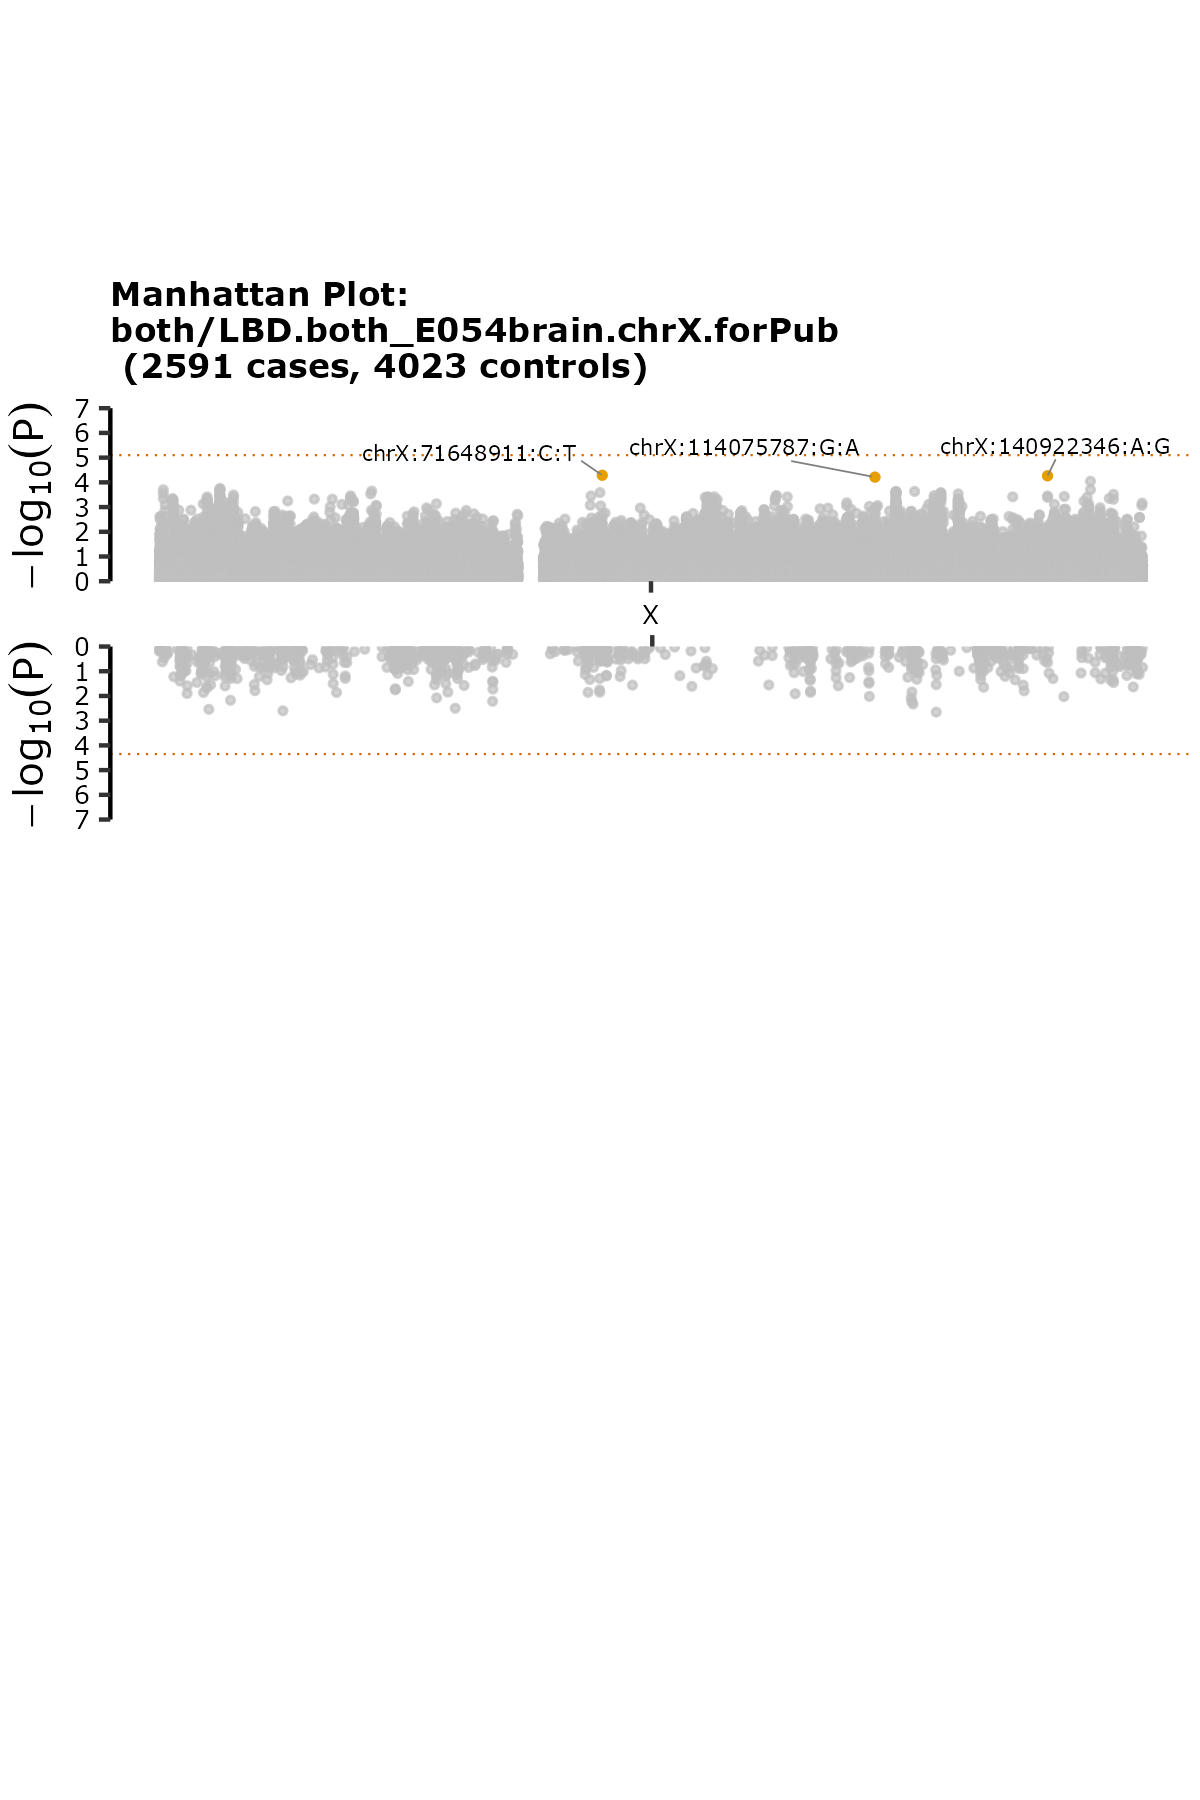

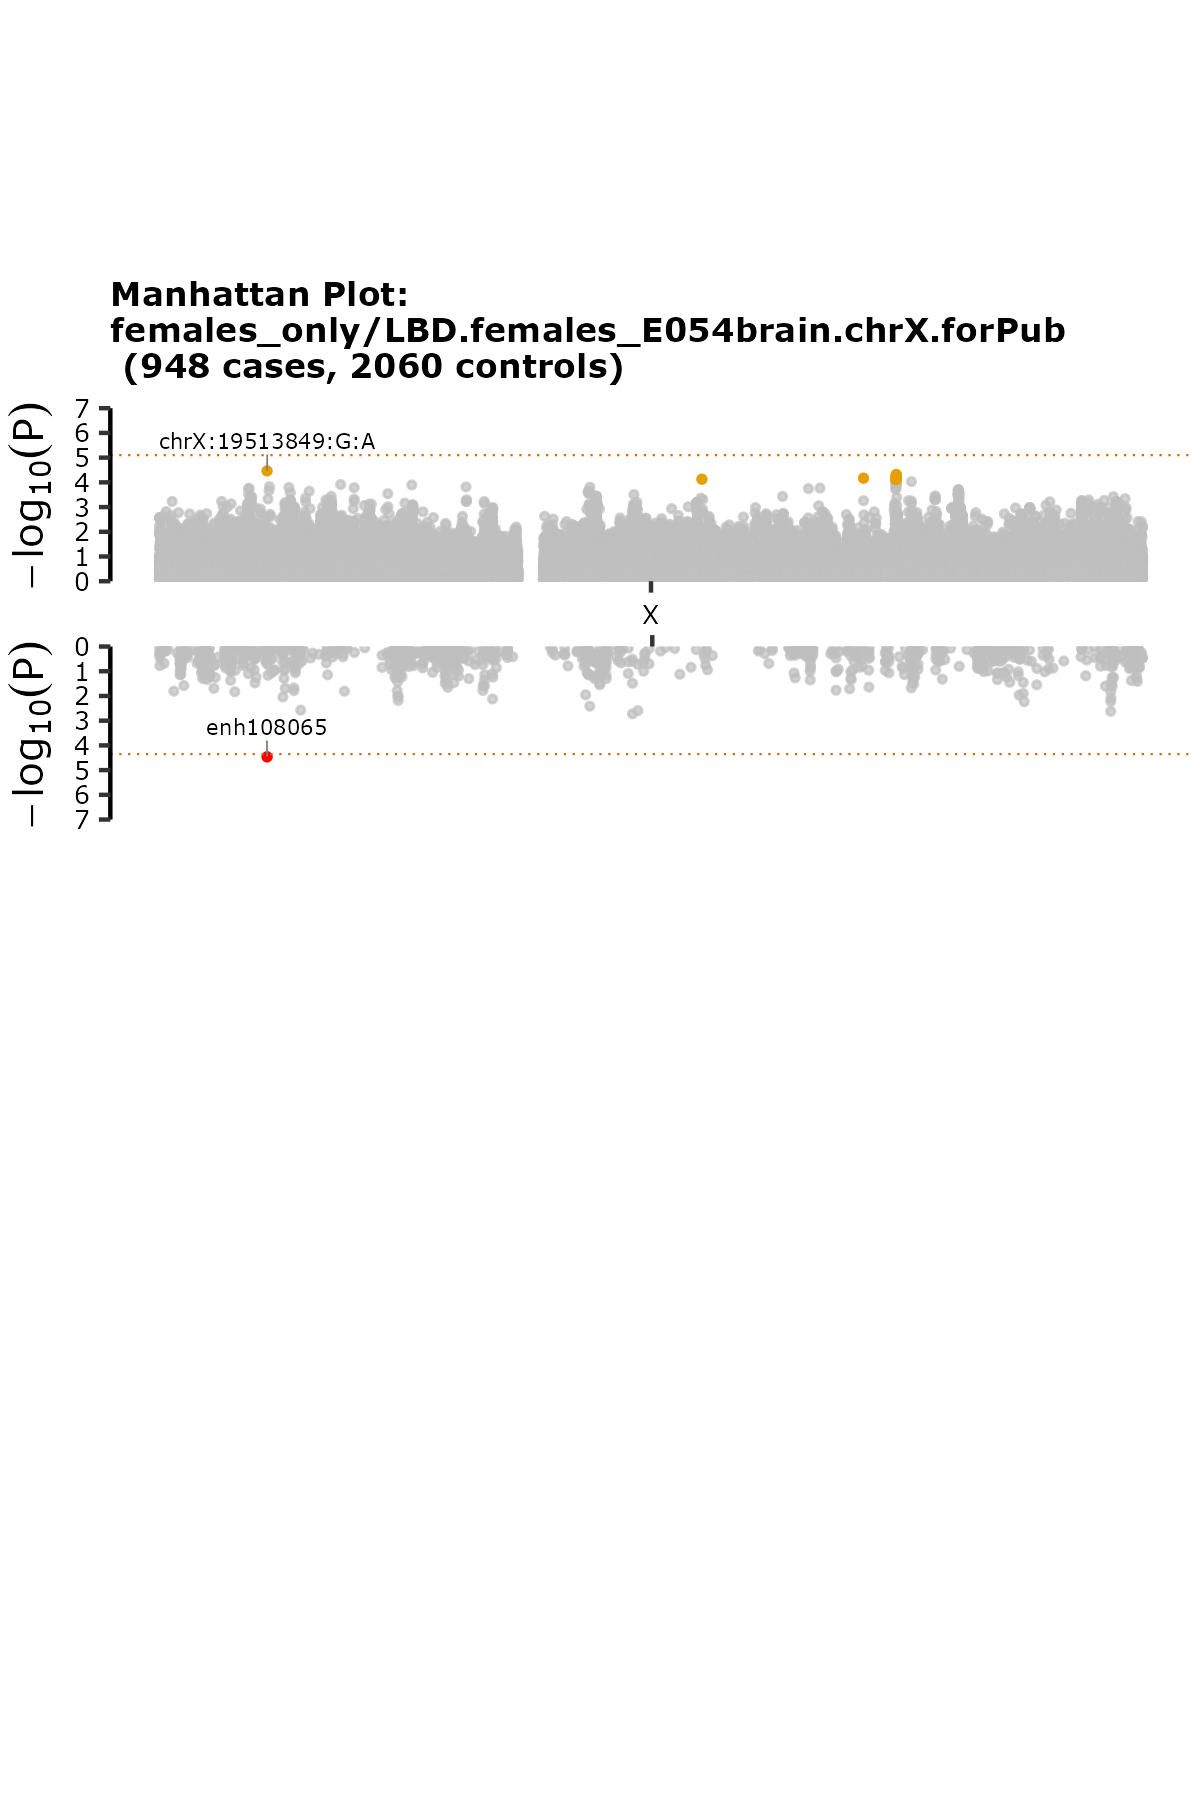

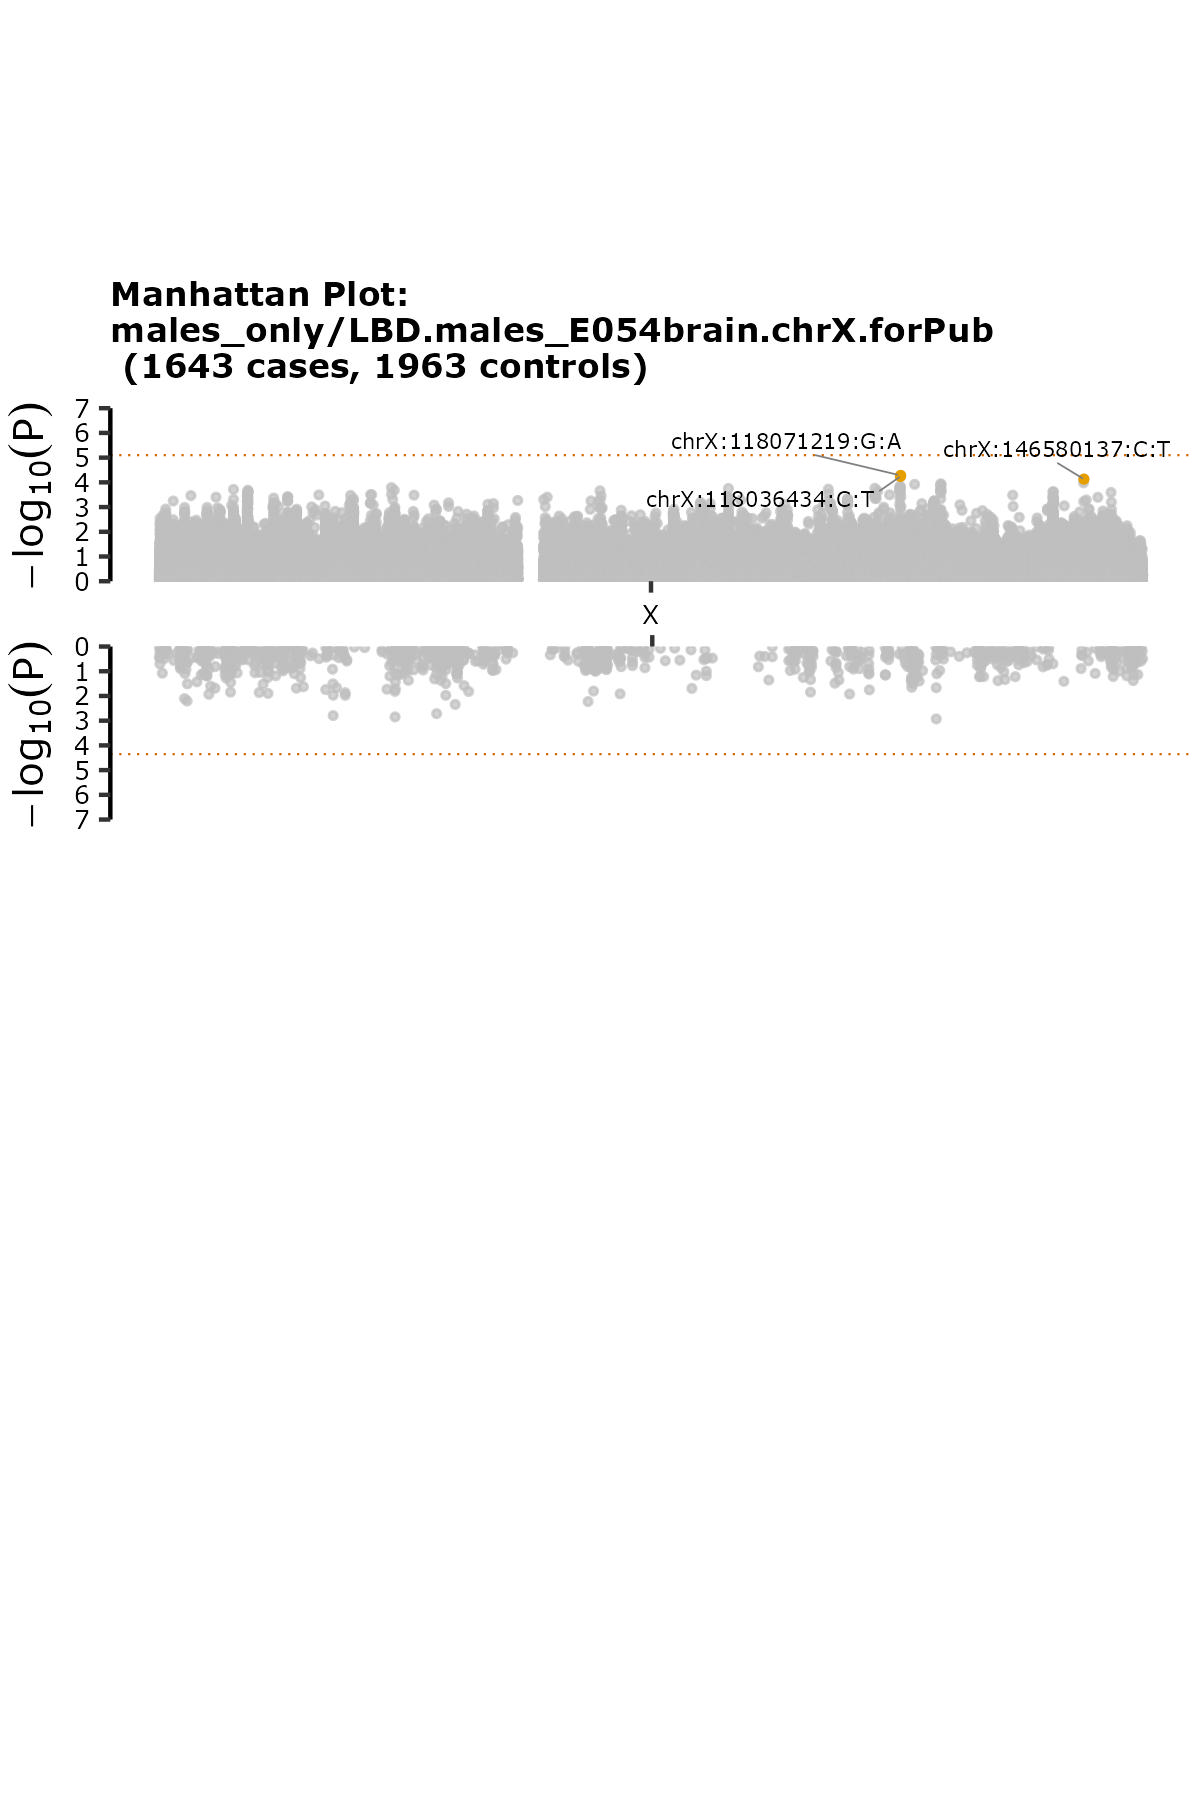

In [1]:
from IPython.display import display
from PIL import Image

print("Manhattan and QQ plots for XWAS analysis (maf overall > 0.01)")

manhattan="RWAS_redo/both/LBD.both_E054brain.chrX.forPub.miami.manhattan_v1.jpeg"
display(Image.open(manhattan))

manhattan="RWAS_redo/females_only/LBD.females_E054brain.chrX.forPub.miami.manhattan_v1.jpeg"
display(Image.open(manhattan))

manhattan="RWAS_redo/males_only/LBD.males_E054brain.chrX.forPub.miami.manhattan_v1.jpeg"
display(Image.open(manhattan))

Manhattan and QQ plots for XWAS analysis (maf overall > 0.01)


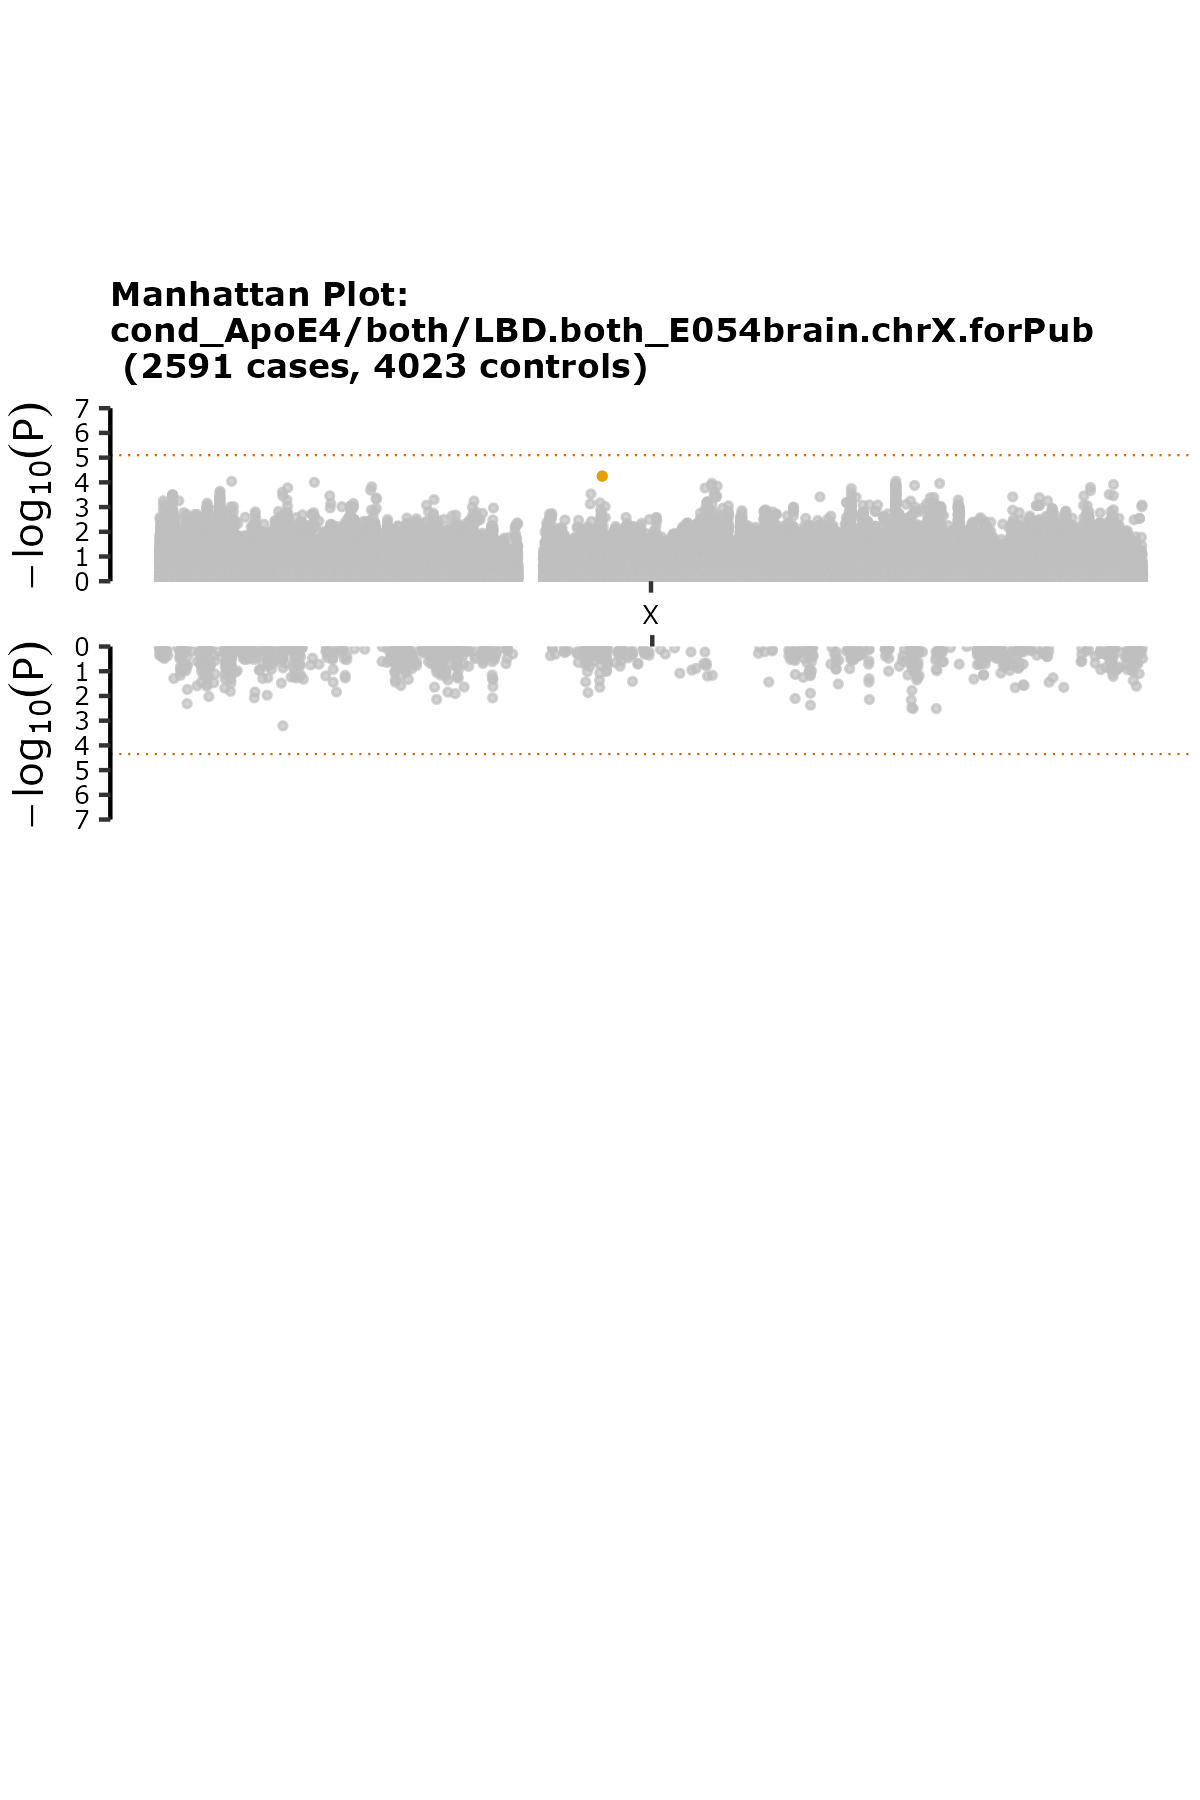

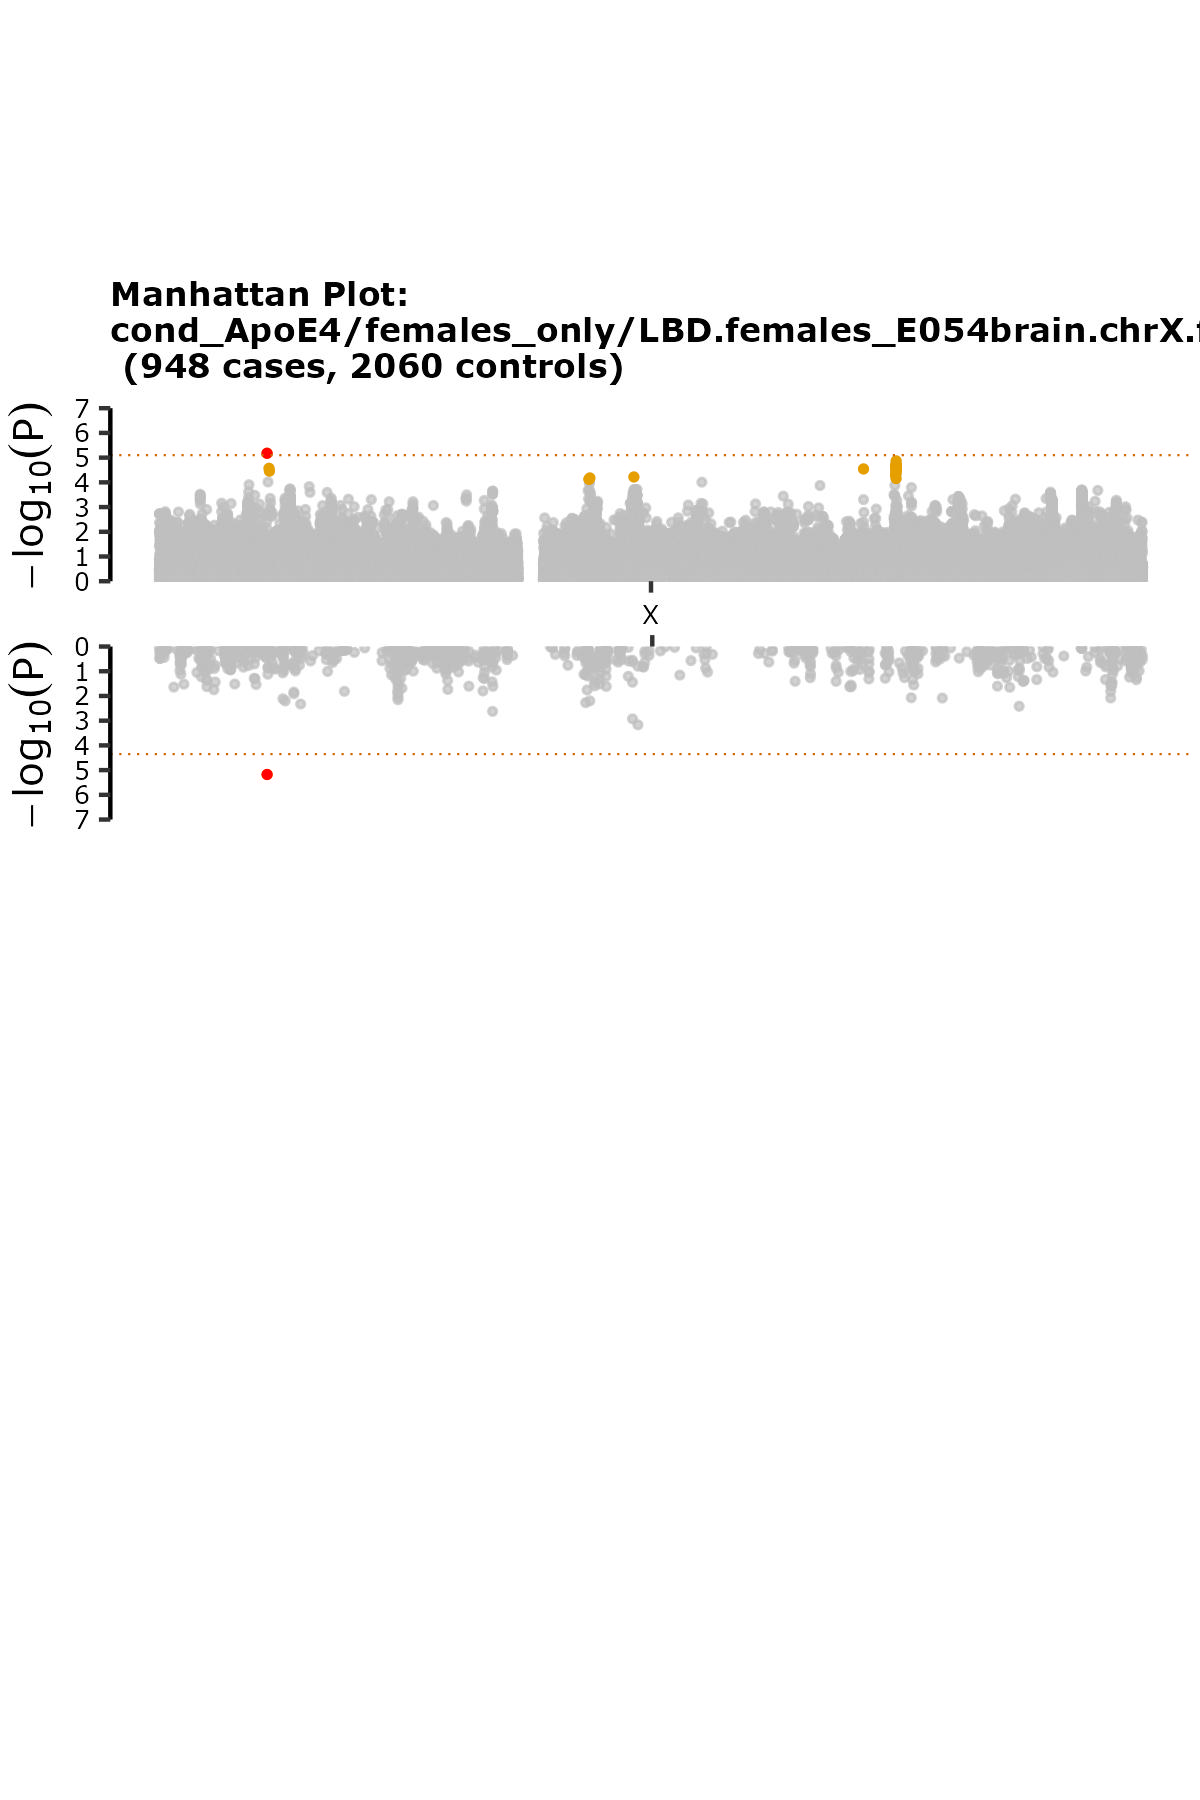

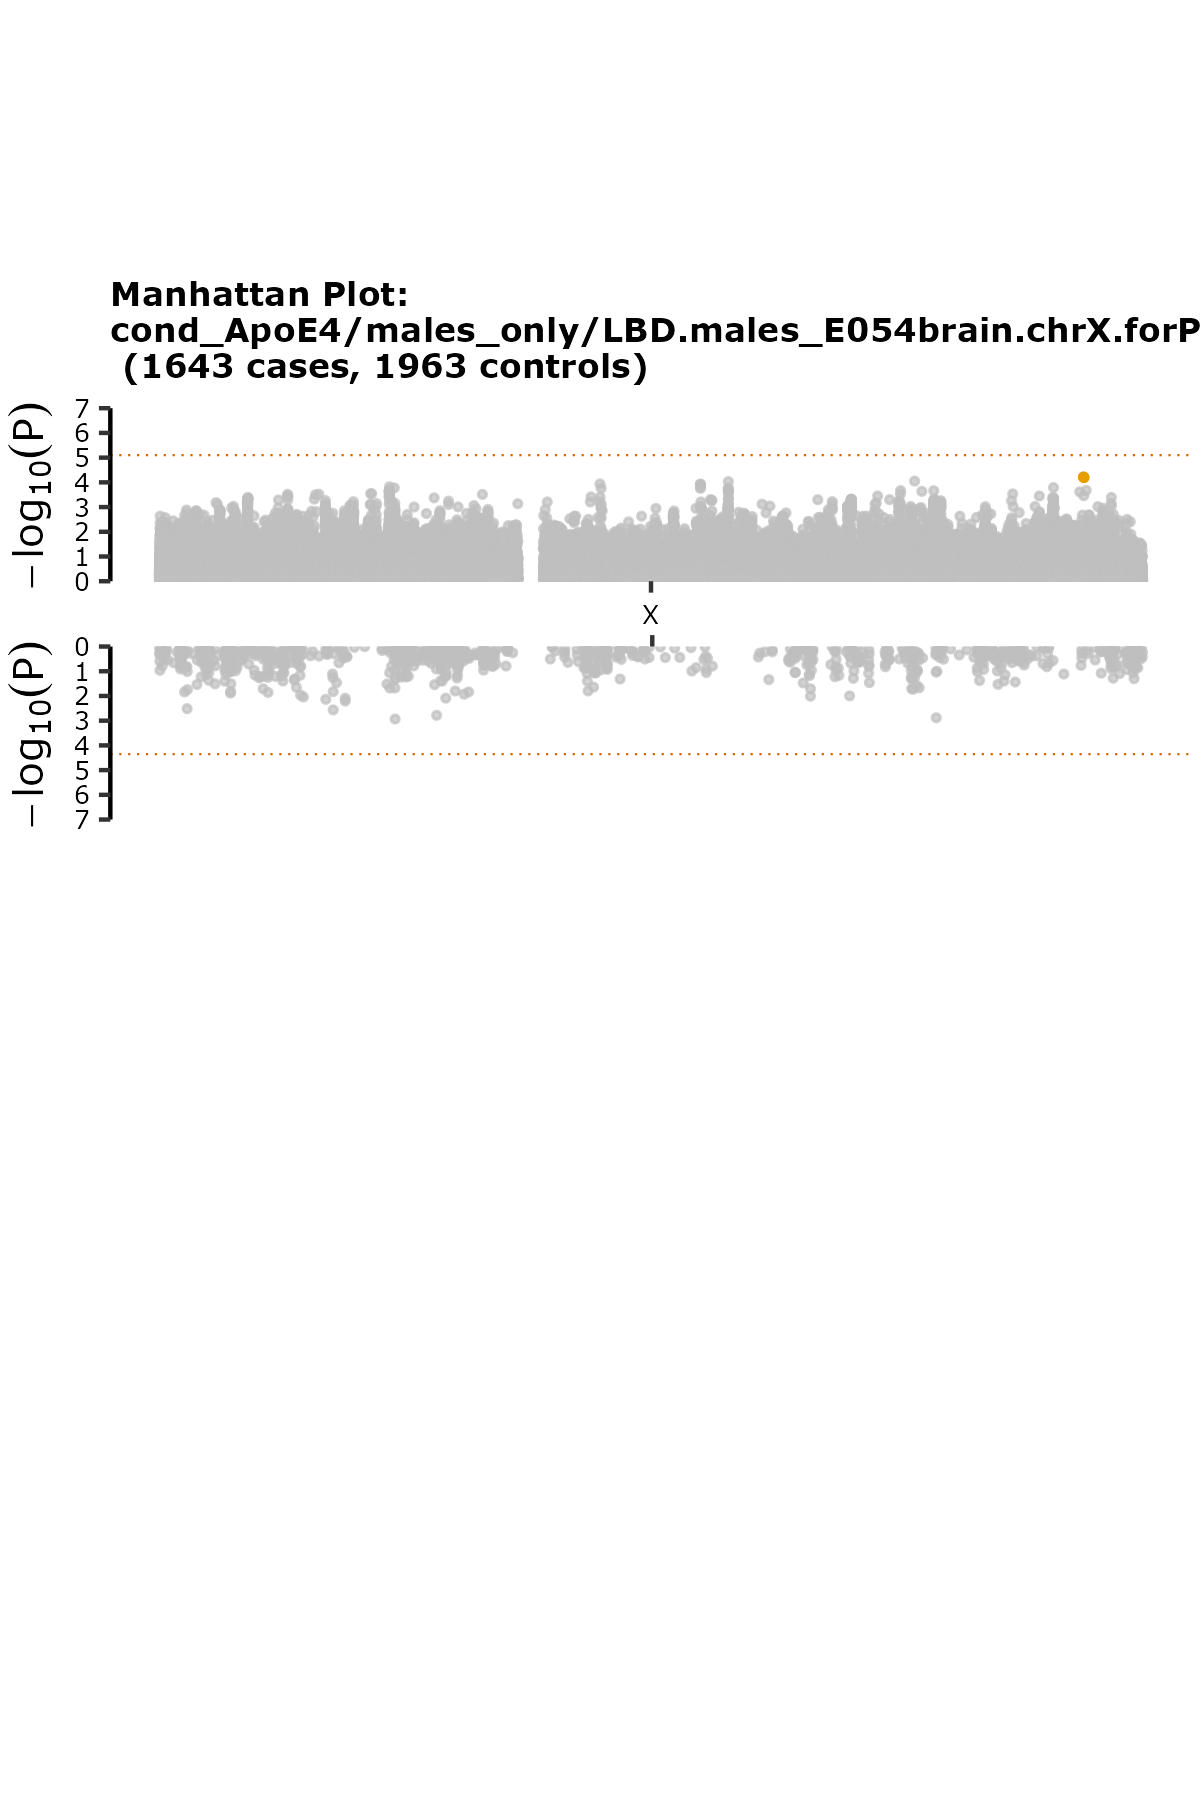

In [61]:
from IPython.display import display
from PIL import Image

print("Manhattan and QQ plots for XWAS analysis (maf overall > 0.01)")

manhattan="RWAS_redo/cond_ApoE4/both/LBD.both_E054brain.chrX.forPub.miami.manhattan_v0.jpeg"
display(Image.open(manhattan))

manhattan="RWAS_redo/cond_ApoE4/females_only/LBD.females_E054brain.chrX.forPub.miami.manhattan_v0.jpeg"
display(Image.open(manhattan))

manhattan="RWAS_redo/cond_ApoE4/males_only/LBD.males_E054brain.chrX.forPub.miami.manhattan_v0.jpeg"
display(Image.open(manhattan))

In [ ]:
Ganglion Eminence derived primary cultured neurospheresRWAS_redo/